# Assignment 1

## Question 3 (Linear Regression)

This assignment will have you working and experimenting with linear regression. The general multiple linear regression model, given $p$ predictors, is defined as: $$Y=\beta_0+\beta_1X_1+\beta_2X_2+...+\beta_pX_p+\epsilon,$$ where $Y$ is the response variable, $X_j$ is the $j$<sup>th</sup> predictor and $\beta_j$ quantifies the association between the response and the variable. A good way to think about $\beta_j$ is as the average effect on $Y$ of a one unit increase in $X_j$, holding all other predictors fixed. The $\epsilon$ term is the error term, which is independent of $X$ and has mean zero (the expected value of $Y$ when all variables are set to zero).

Work with Numpy only and do not use library functions that directly perform model fitting like `np.polyfit`. However, you may use library functions to compare your results while experimenting.

This assignment becomes much easier to complete if accompanied by reading the third chapter in An Introduction to Statistical Learning. The text is freely available for download on the internet at [statlearning.com](statlearning.com)

Reference: James, G., Witten, D., Hastie, T., Tibshirani, R., Taylor, J. (2023). Linear Regression. In: An Introduction to Statistical Learning. Springer Texts in Statistics. Springer, Cham. https://doi.org/10.1007/978-3-031-38747-0_3

### Imports

In [32]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
# import sys
import seaborn as sns
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
import statsmodels.api as sm
# other imports if necessary

In [33]:
# !pip install gdown --upgrade
!gdown 1eBO0BSgQVD_9KYoqIyaIayYs1uJQP1mD
!gdown 1-r0ftE2LLPbhUISu05uh9nBPNQHEBQjS

Downloading...
From: https://drive.google.com/uc?id=1eBO0BSgQVD_9KYoqIyaIayYs1uJQP1mD
To: /content/credit.csv
100% 11.5k/11.5k [00:00<00:00, 37.3MB/s]
Downloading...
From: https://drive.google.com/uc?id=1-r0ftE2LLPbhUISu05uh9nBPNQHEBQjS
To: /content/shark_attacks.csv
100% 2.48k/2.48k [00:00<00:00, 9.00MB/s]


### Part 1: Simple Regression

In this part, the function `gen_data()` samples hundred data points from a random 25 degree single-variable polynomial. This data is stored in the `predictor` and `response` variables. Your task is to experiment with linear regression on this dataset. Specifically:

1. Fit a line to the curve $(y=\beta_1x+\beta_0)$
2. Fit a polynomial to the curve $(y=\sum_{0}^{k}\beta_kx^k)$ and choose $k$ that satisfactorily minimizes error.
    - Note that the original polynomial is a 25 degree polynomial and we might not need exactly that many.
    - Check how well the coefficients match when we try to fit a 25 degree polynomial to the data. Get the coefficients from the `gen_data()` function.

Report error metrics for all experiments in tabular form (or any other way that helps us compare and choose between the different methods)



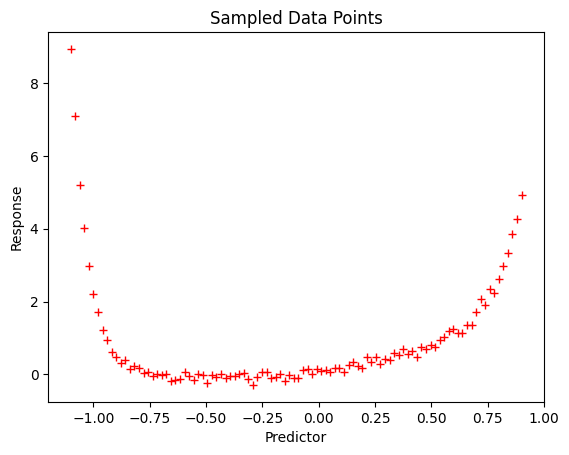

In [34]:
def gen_data():
    coeff = np.random.rand(26)
    x = np.linspace(-1.1, 0.9, 100)
    y = np.zeros_like(x)
    for i, c in enumerate(coeff):
        y += c * x**i
    y += np.random.randn(100) * 0.1

    return x, y, coeff

# Generate data
predictor, response, true_coeff = gen_data()

plt.plot(predictor, response, 'r+')
plt.xlabel('Predictor')
plt.ylabel('Response')
plt.title('Sampled Data Points')
plt.show()

beta_0: 0.8931426844645011
beta_1: 0.20790263988603444


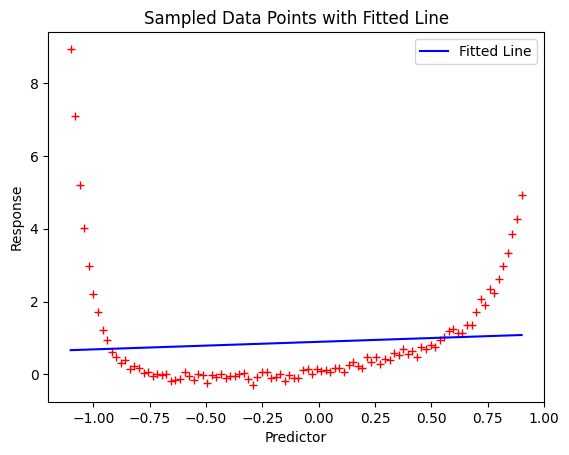

In [35]:
# Fit a line (simple linear regression)

n = len(predictor)
x_bar = np.mean(predictor)
y_bar = np.mean(response)

beta_1 = np.sum((predictor - x_bar) * (response - y_bar)) / np.sum((predictor - x_bar)**2)
beta_0 = y_bar - beta_1 * x_bar

# Print the coefficients
print("beta_0:", beta_0)
print("beta_1:", beta_1)

# Plot the data and the fitted line
plt.plot(predictor, response, 'r+')
plt.plot(predictor, beta_1 * predictor + beta_0, 'b-', label='Fitted Line')
plt.xlabel('Predictor')
plt.ylabel('Response')
plt.title('Sampled Data Points with Fitted Line')
plt.legend()
plt.show()

2.3959209011915794


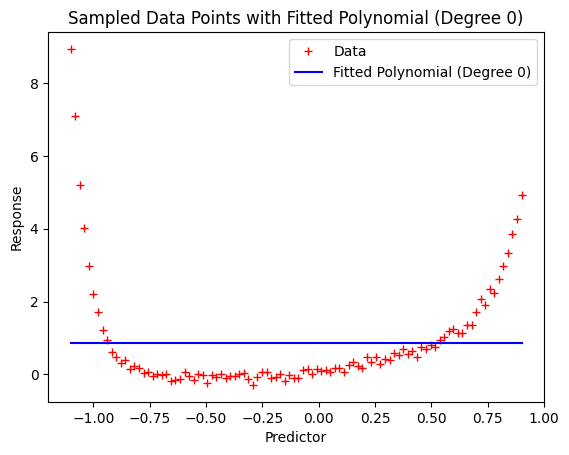

2.381221997909324


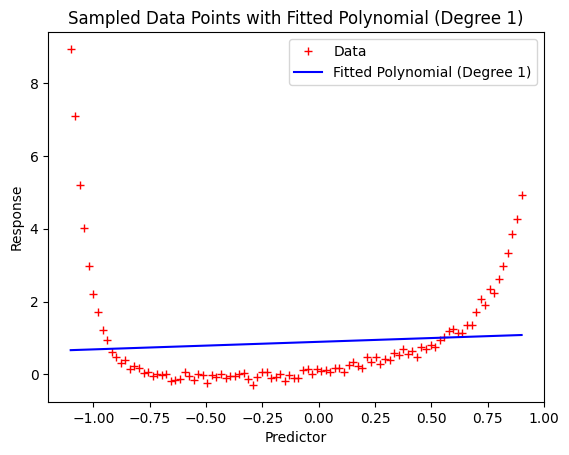

0.8858807920544299


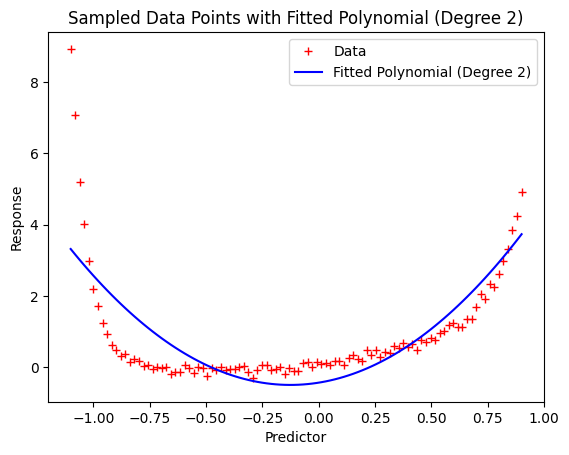

0.7720287829411447


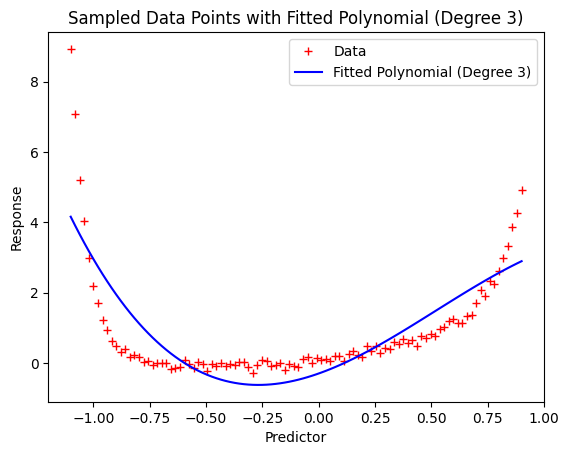

0.2654440859352599


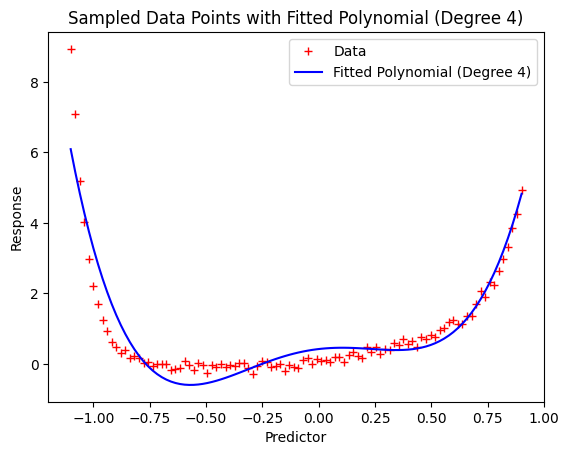

0.1834011927058718


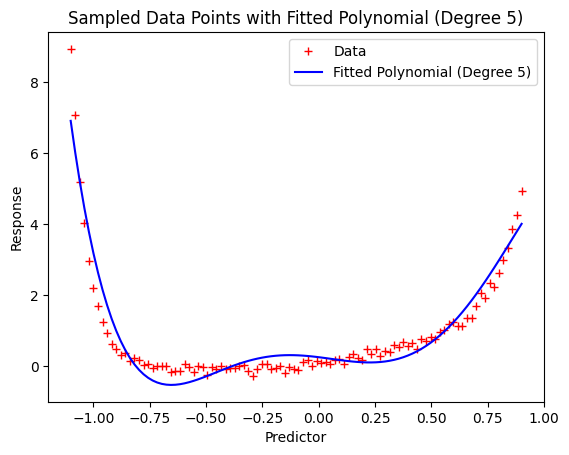

0.04997682754050653


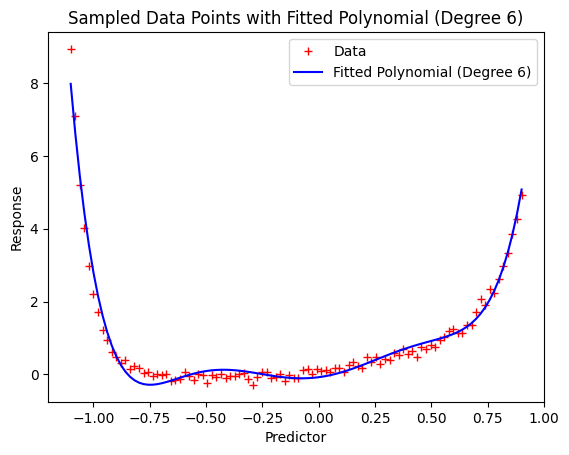

0.026793078643555634


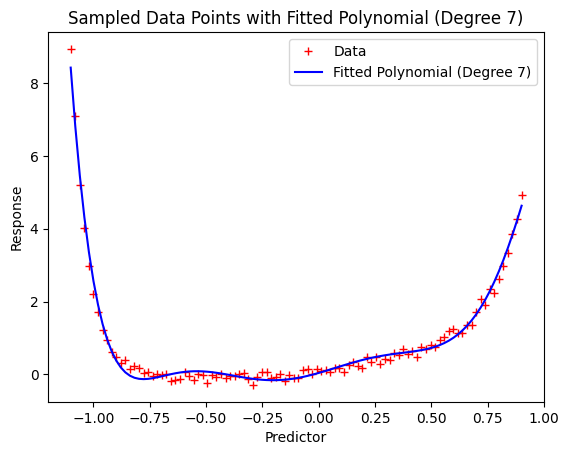

0.012250122138137667


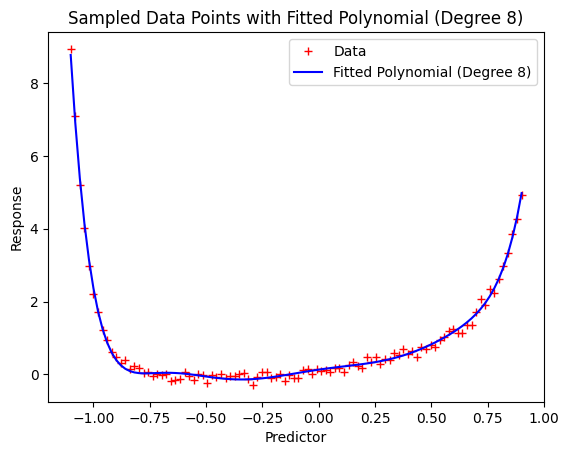

0.009499666792004799


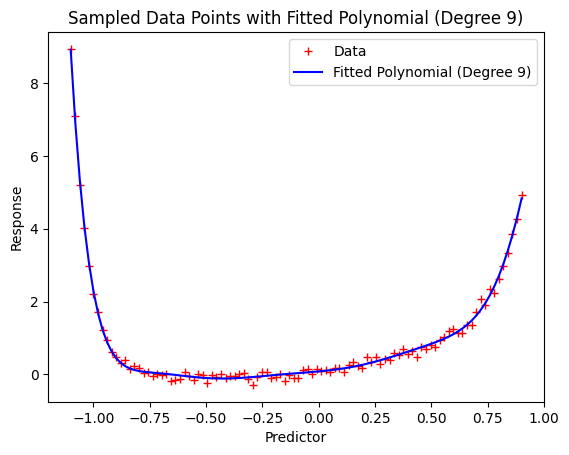

0.00805307392184248


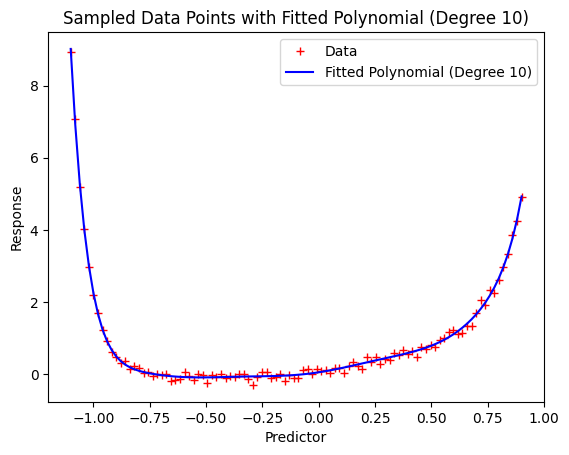

0.008042603128166112


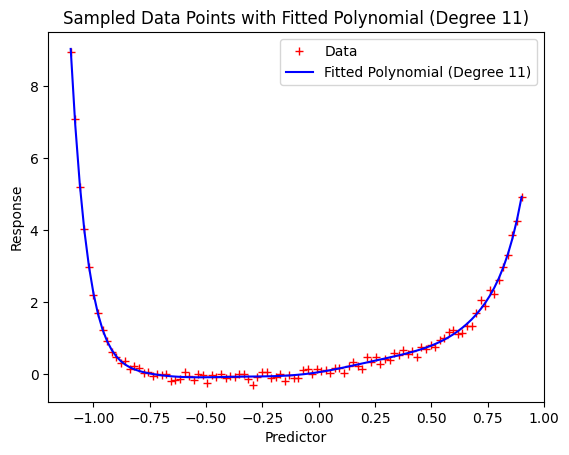

0.008001275672128036


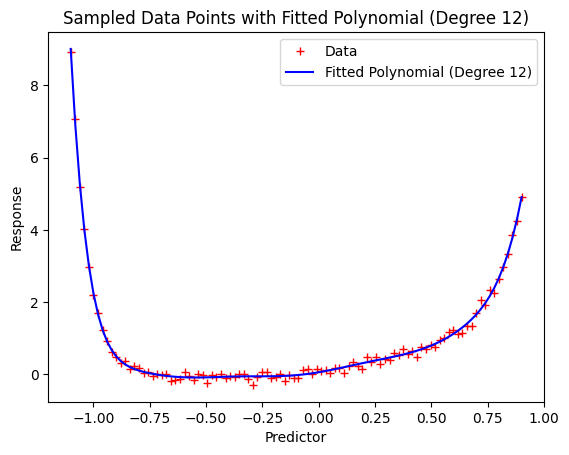

0.007879666614928253


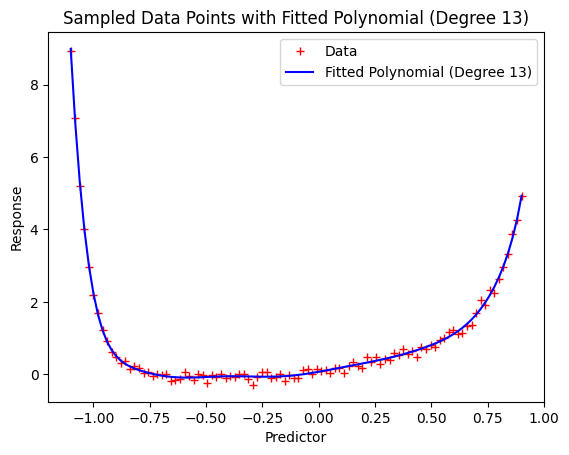

0.007825636204231911


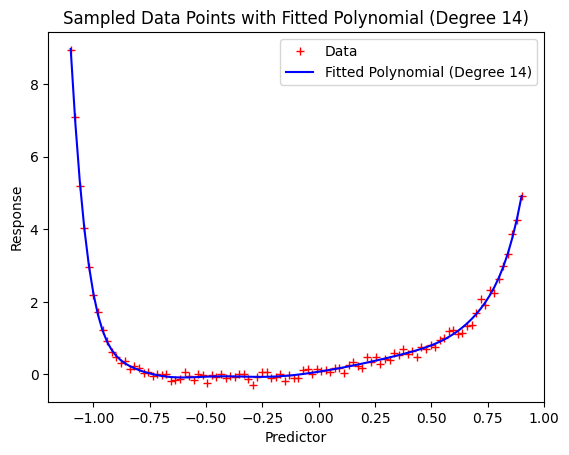

0.007825611939613019


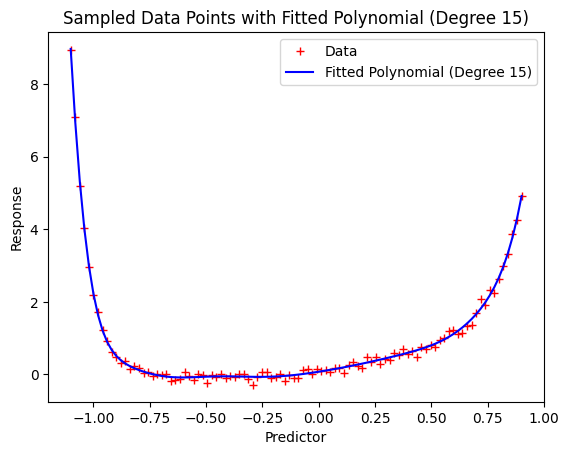

0.007821711145402336


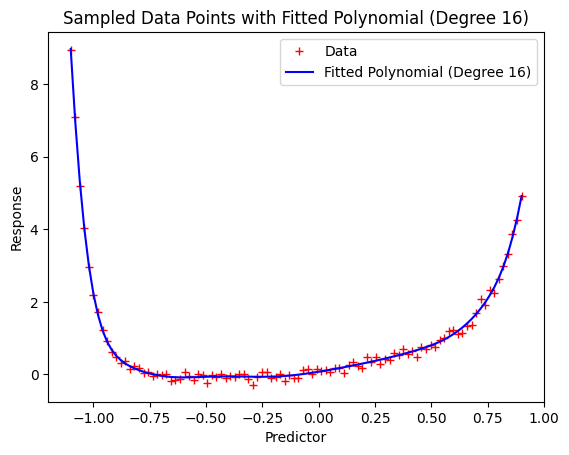

0.007821107220206487


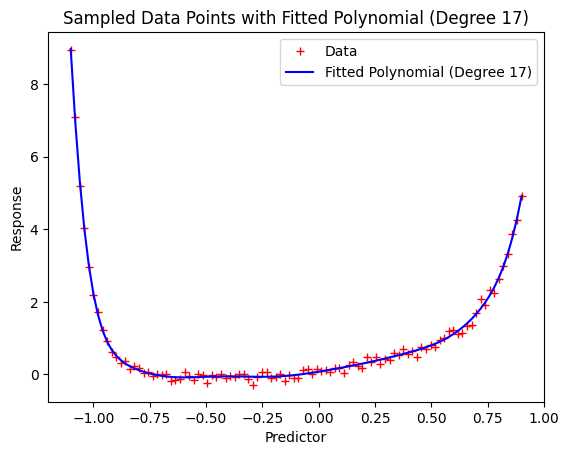

0.007722475660958329


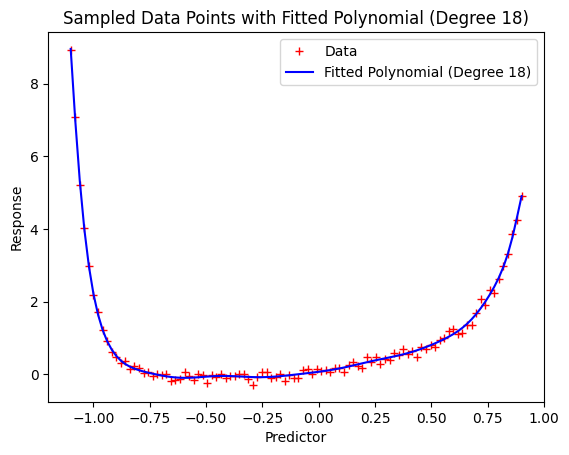

0.007721351153626199


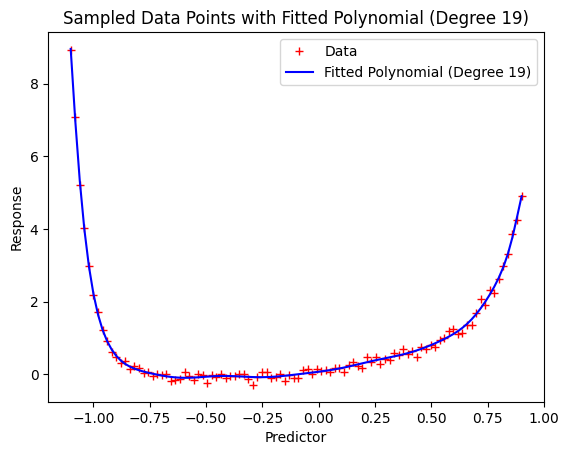

0.007640910810223051


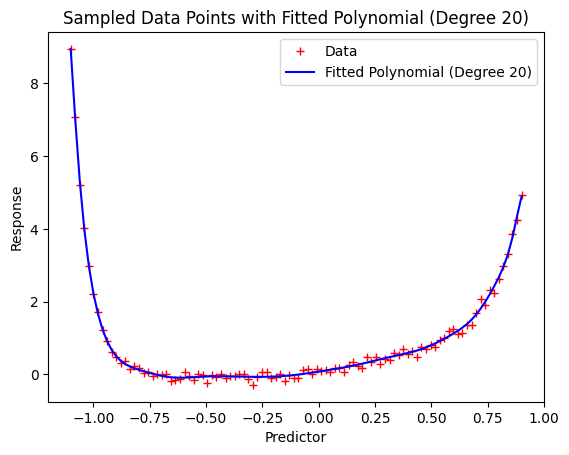

0.00917819090761498


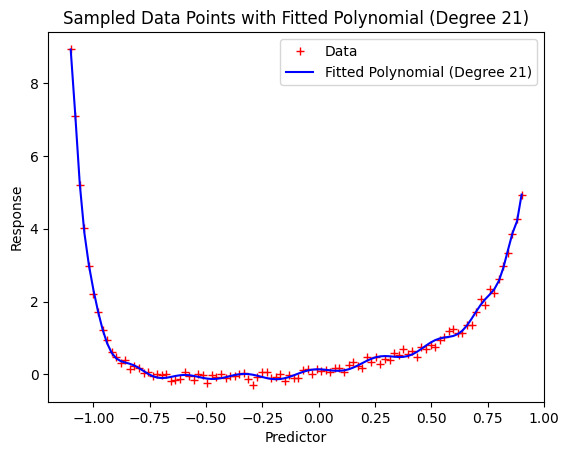

0.00826455425410646


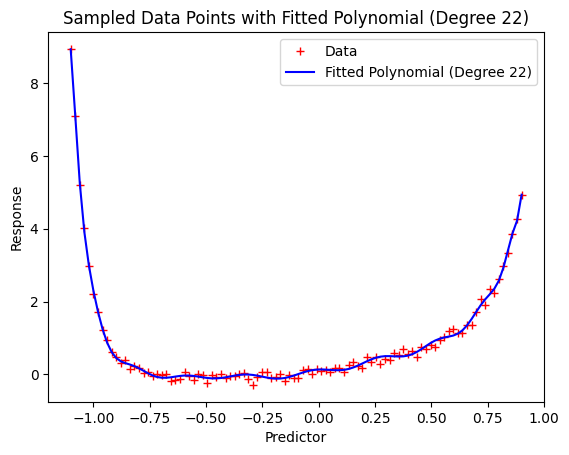

0.007183581984819024


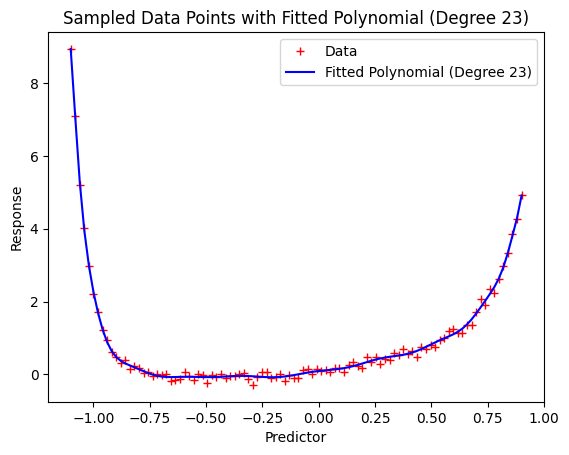

0.007089172362738192


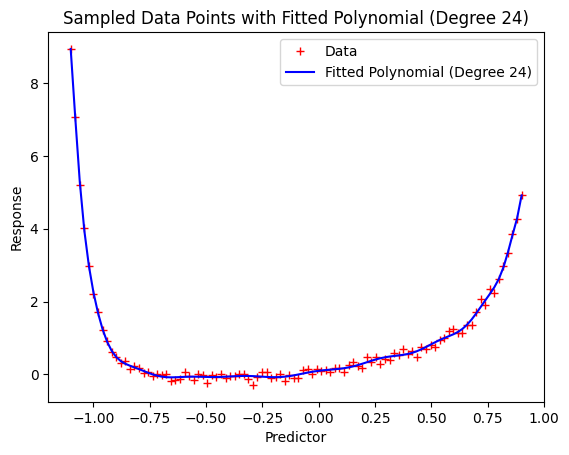

0.007255455235134084
Coefficients for a 25-degree polynomial:
[ 9.84815761e-02  6.66442435e-01 -4.75835050e+00  1.94538379e+01
  2.30571644e+02 -3.99098225e+02 -3.38894344e+03  3.24433812e+03
  2.51199498e+04 -1.21882751e+04 -1.05396799e+05  1.71540993e+04
  2.58959787e+05  2.10104463e+04 -3.53048843e+05 -1.04578587e+05
  1.81721046e+05  1.18191844e+05  1.63134789e+05  7.41270135e+03
 -3.08784554e+05 -1.17104431e+05  1.77050032e+05  8.72798227e+04
 -3.55096234e+04 -1.99625070e+04]
Axtual Coefficients of 25-degree polynomial:
[0.08860631 0.76173055 0.9320574  0.38549587 0.66440907 0.47064618
 0.13026171 0.7731705  0.92824564 0.53848651 0.94251877 0.63946194
 0.96141586 0.07212196 0.61410616 0.17906848 0.19431027 0.31593889
 0.8701822  0.31173905 0.52346474 0.28133207 0.35439869 0.26994473
 0.67885464 0.58644956]


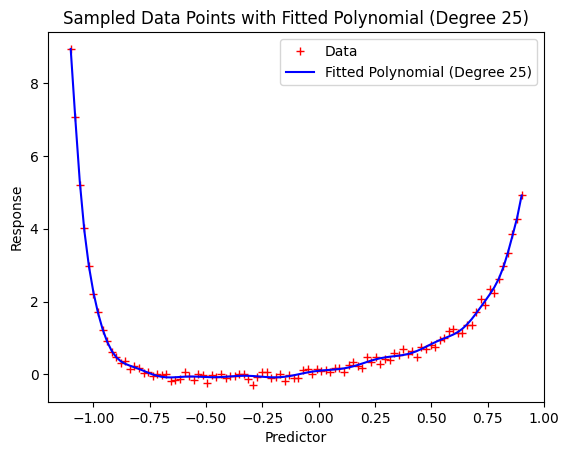

Best degree that minimizes error: 24


In [36]:
min_error = float('inf')
best_degree = -1



for degree in range(26):
    # Create the matrix X with predictor values up to the chosen degree
    X = np.column_stack([predictor**i for i in range(degree + 1)])

    # Solve the normal equations to find coefficients
    beta = np.linalg.solve(X.T @ X, X.T @ response)

    # Calculate the predicted values
    y_pred = X @ beta

    # Calculate the mean squared error
    error = np.mean((response - y_pred)**2)
    print(error)

    # Update best_degree if the current degree gives lower error
    if error < min_error:
        min_error = error
        best_degree = degree

    # Print coefficients for a 25-degree polynomial
    if degree == 25:
        print(f"Coefficients for a 25-degree polynomial:\n{beta}")
        print(f"Axtual Coefficients of 25-degree polynomial:\n{true_coeff}")

    # Plot the data and the fitted polynomial
    plt.figure()
    plt.plot(predictor, response, 'r+', label='Data')
    plt.plot(predictor, y_pred, 'b-', label=f'Fitted Polynomial (Degree {degree})')
    plt.xlabel('Predictor')
    plt.ylabel('Response')
    plt.title(f'Sampled Data Points with Fitted Polynomial (Degree {degree})')
    plt.legend()
    plt.show()

# Print the best degree
print(f"Best degree that minimizes error: {best_degree}")

### Part 1.1 Regularization

In this section, you will be required to perform the converse of the previous section. After generating data from a lower degree polynomial, you will try to fit a higher degree polynomial to it. This will result in overfitting. You will then use regularization to reduce the overfitting. Try both L1 and L2 regularization and compare the results.

[0.68146266 0.49989124 0.57325042 0.09891732 0.37639085 0.89372962
 0.01340883]
0 0.6814626591243659
1 0.4998912432347675
2 0.5732504191473127
3 0.09891731518319036
4 0.3763908505139135
5 0.8937296197761356
6 0.013408830048317943


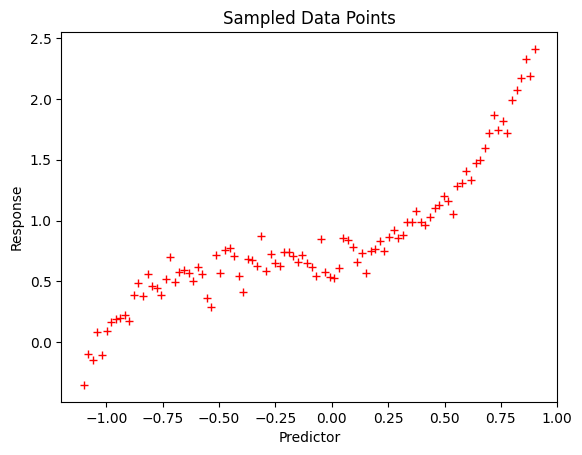

In [37]:
def gen_data_low():
    coeff = np.random.rand(np.random.choice([3, 5, 7]))
    print(coeff)
    x = np.linspace(-1.1, 0.9, 100)
    y = np.zeros_like(x)
    for i, c in enumerate(coeff):
        y += c * x**i
        print(i,c)
    y += np.random.randn(100) * 0.1

    return x, y, coeff

predictor_low, response_low, true_coeff_low = gen_data_low()

plt.plot(predictor_low, response_low, 'r+')
plt.xlabel('Predictor')
plt.ylabel('Response')
plt.title('Sampled Data Points')
plt.show()

In [38]:
# @title Default title text
# import numpy as np
# import matplotlib.pyplot as plt
# from sklearn.preprocessing import PolynomialFeatures
# from sklearn.linear_model import LinearRegression, Lasso, Ridge
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import mean_squared_error

# # Function to generate data from a higher degree polynomial
# def gen_data_high():
#     coeff = np.random.rand(np.random.choice([8, 10, 12]))
#     x = np.linspace(-1.1, 0.9, 100)
#     y = np.zeros_like(x)
#     for i, c in enumerate(coeff):
#         y += c * x**i
#     y += np.random.randn(100) * 0.1
#     return x, y, coeff

# # Generate higher degree polynomial data
# predictor_high, response_high, true_coeff_high = gen_data_high()

# # Plot the higher degree polynomial data
# plt.plot(predictor_high, response_high, 'r+')
# plt.xlabel('Predictor')
# plt.ylabel('Response')
# plt.title('Sampled Data Points (Higher Degree Polynomial)')
# plt.show()

# # Function to fit and plot polynomial regression
# def fit_and_plot_polynomial(X, y, degree, alpha, penalty, title):
#     poly = PolynomialFeatures(degree=degree)
#     X_poly = poly.fit_transform(X.reshape(-1, 1))

#     X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)

#     if penalty == 'l1':
#         model = Lasso(alpha=alpha)
#     elif penalty == 'l2':
#         model = Ridge(alpha=alpha)
#     else:
#         model = LinearRegression()

#     model.fit(X_train, y_train)

#     y_pred = model.predict(X_test)

#     plt.plot(X, y, color='r', label='Data')
#     plt.plot(X_test[:, 1], y_pred, color='b', label='Prediction')
#     plt.title(title)
#     plt.legend()
#     plt.show()

#     mse = mean_squared_error(y_test, y_pred)
#     print(f'{title} - Mean Squared Error: {mse:.4f}')

# # Fit and plot without regularization
# fit_and_plot_polynomial(predictor_high, response_high, degree=15, alpha=0, penalty='', title='No Regularization')

# # Fit and plot with L1 regularization
# fit_and_plot_polynomial(predictor_high, response_high, degree=15, alpha=0.01, penalty='l1', title='L1 Regularization')

# # Fit and plot with L2 regularization
# fit_and_plot_polynomial(predictor_high, response_high, degree=15, alpha=0.01, penalty='l2', title='L2 Regularization')


In [39]:
# @title Default title text
# import numpy as np
# import matplotlib.pyplot as plt

# # Helper functions
# def polynomial_regression(X, beta):
#     return np.sum(X * beta, axis=1)

# def objective_function(beta, X, y, alpha, regularization_type):
#     error = np.sum((y - polynomial_regression(X, beta))**2) / (2 * len(y))
#     if regularization_type == 'L1':
#         regularization_term = alpha * np.sum(np.abs(beta))
#     elif regularization_type == 'L2':
#         regularization_term = alpha * np.sum(beta**2)
#     else:
#         regularization_term = 0

#     return error + regularization_term

# def gradient_descent(X, y, alpha, regularization_type, learning_rate=0.01, num_iterations=5000):
#     n, p = X.shape
#     beta = np.zeros(p)

#     for _ in range(num_iterations):
#         gradient = np.dot(X.T, polynomial_regression(X, beta) - y) / n

#         if regularization_type == 'L1':
#             regularization_term = alpha * np.sign(beta)
#             gradient += regularization_term
#         elif regularization_type == 'L2':
#             regularization_term = alpha * beta
#             gradient += regularization_term

#         beta -= learning_rate * gradient

#     objective_value = objective_function(beta, X, y, alpha, regularization_type)
#     return beta, objective_value

# # Model fitting and regularization
# min_error_l1 = float('inf')
# min_error_l2 = float('inf')
# best_degree_l1 = -1
# best_degree_l2 = -1

# for degree in range(26):
#     X = np.column_stack([predictor_low**i for i in range(degree + 1)])
#     alpha = 0.16

#     beta_l1, objective_value_l1 = gradient_descent(X, response_low, alpha, 'L1')
#     beta_l2, objective_value_l2 = gradient_descent(X, response_low, alpha, 'L2')


#     print(f"Coefficients for L1 regularization:{beta_l1}")
#     print(f"Coefficients for L2 regularization:{beta_l2}")

#     plt.plot(predictor_low, response_low, 'r+', label='Data')
#     plt.plot(predictor_low, polynomial_regression(X, beta_l1), 'b-', label=f'Fitted Polynomial of degree {degree} (L1 Regularization)')
#     plt.plot(predictor_low, polynomial_regression(X, beta_l2), 'g-', label=f'Fitted Polynomial of degree {degree} (L2 Regularization)')
#     plt.xlabel('Predictor')
#     plt.ylabel('Response')
#     plt.title(f'Sampled Data Points with Fitted Polynomials of degree {degree} (L1 and L2 Regularization)')
#     plt.legend()
#     plt.show()


#     if objective_value_l1 < min_error_l1:
#         min_error_l1 = objective_value_l1
#         best_degree_l1 = degree

#     if objective_value_l2 < min_error_l2:
#         min_error_l2 = objective_value_l2
#         best_degree_l2 = degree

# # Print best degrees and actual degree
# print(f"Best degree that minimizes error in L1: {best_degree_l1}")
# print(f"Best degree that minimizes error in L2: {best_degree_l2}")
# print(f"Actual degree: {len(true_coeff_low)-1}")
# print(f"Actual coefficients: {true_coeff_low}")

# # Plotting the final fitted polynomials
# X_best_l1 = np.column_stack([predictor_low**i for i in range(best_degree_l1 + 1)])
# beta_best_l1, _ = gradient_descent(X_best_l1, response_low, alpha, 'L1')

# X_best_l2 = np.column_stack([predictor_low**i for i in range(best_degree_l2 + 1)])
# beta_best_l2, _ = gradient_descent(X_best_l2, response_low, alpha, 'L2')

# plt.plot(predictor_low, response_low, 'r+', label='Data')
# plt.plot(predictor_low, polynomial_regression(X_best_l1, beta_best_l1), 'b-', label=f'Fitted Polynomial (L1 Regularization)')
# plt.plot(predictor_low, polynomial_regression(X_best_l2, beta_best_l2), 'g-', label=f'Fitted Polynomial (L2 Regularization)')
# plt.xlabel('Predictor')
# plt.ylabel('Response')
# plt.title(f'Sampled Data Points with Best Fitted Polynomials (L1 and L2 Regularization)')
# plt.legend()
# plt.show()


In [40]:
# @title Default title text
# # Helper functions
# def polynomial_regression(X, beta):
#     return np.sum(X * beta, axis=1)

# def objective_function(beta, X, y, alpha, regularization_type):
#     error = np.sum((y - polynomial_regression(X, beta))**2) / (2 * len(y))
#     if regularization_type == 'L1':
#         regularization_term = alpha * np.sum(np.abs(beta[1:]))
#     elif regularization_type == 'L2':
#         regularization_term = alpha * np.sum(beta[1:]**2)
#     else:
#         regularization_term = 0

#     return error + regularization_term

# def gradient_descent(X, y, alpha, regularization_type, learning_rate=0.01, num_iterations=5000):
#     n, p = X.shape
#     beta = np.zeros(p)

#     for _ in range(num_iterations):
#         gradient = np.dot(X.T, polynomial_regression(X, beta) - y) / n

#         if regularization_type == 'L1':
#             regularization_term = alpha * np.sign(beta[1:])
#             gradient[1:] += regularization_term
#         elif regularization_type == 'L2':
#             regularization_term = alpha * beta[1:]
#             gradient[1:] += regularization_term

#         beta -= learning_rate * gradient

#     objective_value = objective_function(beta, X, y, alpha, regularization_type)
#     print(f"Error with {regularization_type} : {objective_value}")
#     return beta, objective_value

# # Model fitting and regularization
# min_error_l1 = float('inf')
# min_error_l2 = float('inf')
# best_degree_l1 = -1
# best_degree_l2 = -1

# for degree in range(26):
#     X = np.column_stack([predictor_low**i for i in range(degree + 1)])
#     alpha = 0.16

#     beta_l1, objective_value_l1 = gradient_descent(X, response_low, alpha, 'L1')
#     beta_l2, objective_value_l2 = gradient_descent(X, response_low, alpha, 'L2')

#     print(f"Coefficients for L1 regularization:{beta_l1}")
#     print(f"Coefficients for L2 regularization:{beta_l2}")

#     plt.plot(predictor_low, response_low, 'r+', label='Data')
#     plt.plot(predictor_low, polynomial_regression(X, beta_l1), 'b-', label=f'Fitted Polynomial of degree {degree} (L1 Regularization)')
#     plt.plot(predictor_low, polynomial_regression(X, beta_l2), 'g-', label=f'Fitted Polynomial of degree {degree} (L2 Regularization)')
#     plt.xlabel('Predictor')
#     plt.ylabel('Response')
#     plt.title(f'Sampled Data Points with Fitted Polynomials of degree {degree} (L1 and L2 Regularization)')
#     plt.legend()
#     plt.show()

#     if objective_value_l1 < min_error_l1:
#         min_error_l1 = objective_value_l1
#         best_degree_l1 = degree

#     if objective_value_l2 < min_error_l2:
#         min_error_l2 = objective_value_l2
#         best_degree_l2 = degree
# print()
# print(f"Best degree that minimizes error in l1: {best_degree_l1} {min_error_l1}")
# print(f"Best degree that minimizes error in l2: {best_degree_l2} {min_error_l2}")
# print(f"Actual degree: {len(true_coeff_low)-1}")
# print(f"Actual coefficients: {true_coeff_low}")

beta_0: 0.9071871679957272
beta_1: 0.8292251608297633


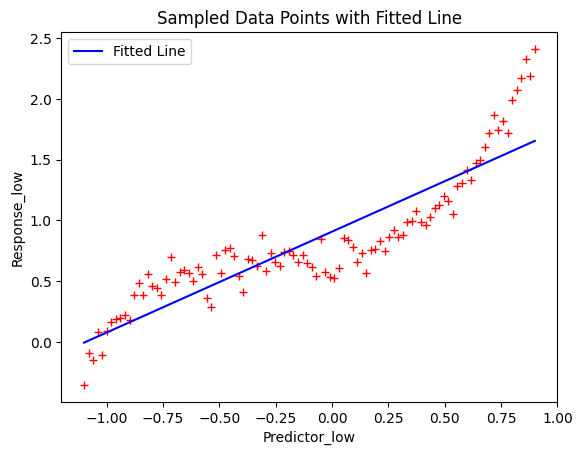

0.29534190111191877
Coefficients for a 0-degree polynomial:
[0.82426465]


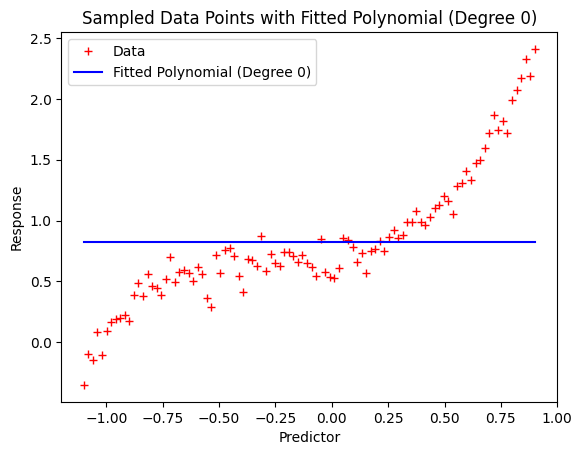

0.06150671221404715
Coefficients for a 1-degree polynomial:
[0.90718717 0.82922516]


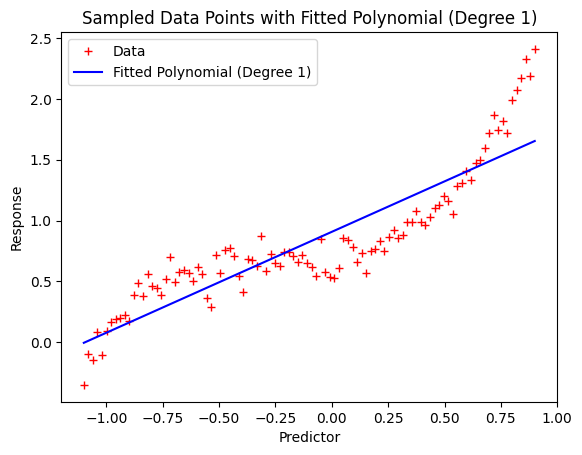

0.043715474453329135
Coefficients for a 2-degree polynomial:
[0.76242307 0.91694308 0.43858959]


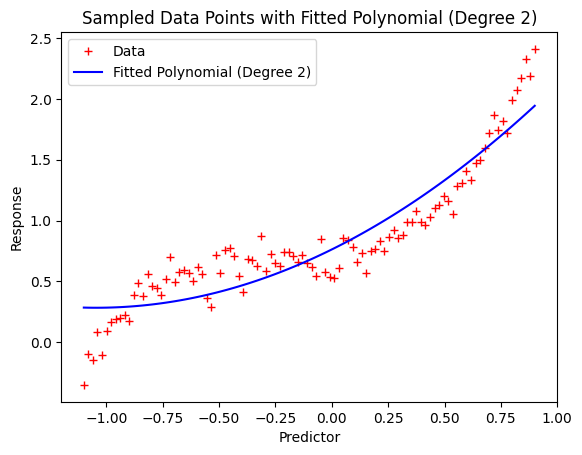

0.009510029432299415
Coefficients for a 3-degree polynomial:
[0.69091231 0.22559164 0.79493208 1.18780828]


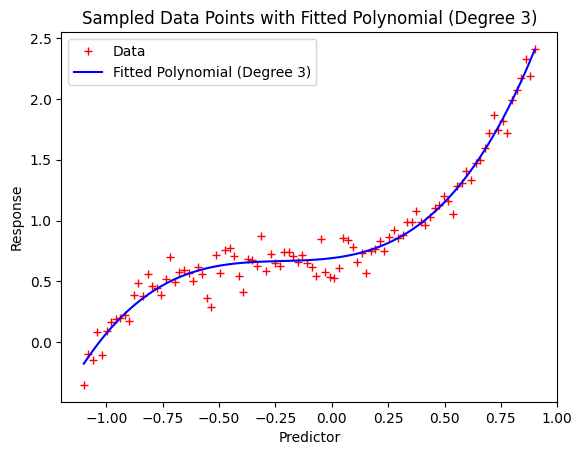

0.009325445528847209
Coefficients for a 4-degree polynomial:
[ 0.67710269  0.25489799  0.93460188  1.11918858 -0.17154925]


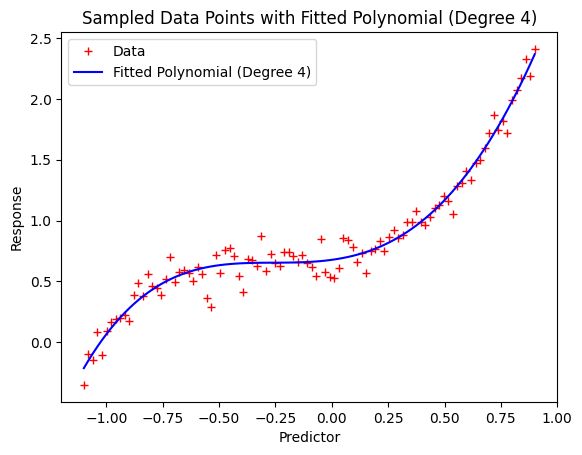

0.009168560067160632
Coefficients for a 5-degree polynomial:
[ 0.68447303  0.32165773  0.8316952   0.79696415 -0.01556541  0.31196768]


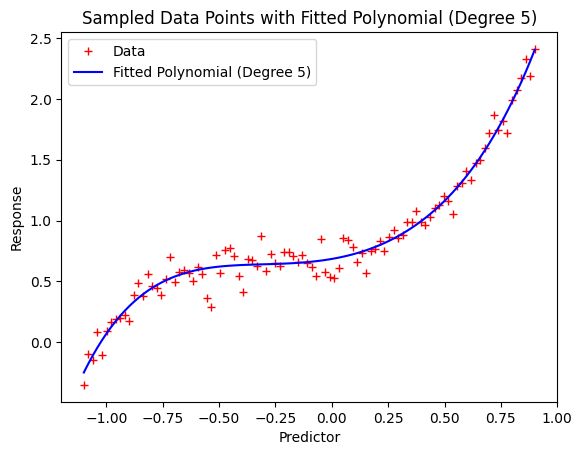

0.009091162513236679
Coefficients for a 6-degree polynomial:
[ 0.69241076  0.28313936  0.6626636   1.02910139  0.52146481  0.05209045
 -0.43312871]


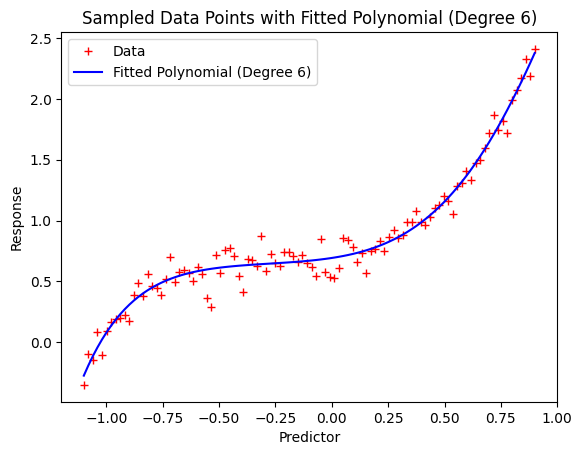

0.0090416826530591
Coefficients for a 7-degree polynomial:
[ 0.68700856  0.23912036  0.8082772   1.44117174 -0.01874888 -0.93234899
  0.04681104  0.68562822]
Axtual Coefficients of given polynomial:
[0.68146266 0.49989124 0.57325042 0.09891732 0.37639085 0.89372962
 0.01340883]
Axtual degree of given polynomial:
6


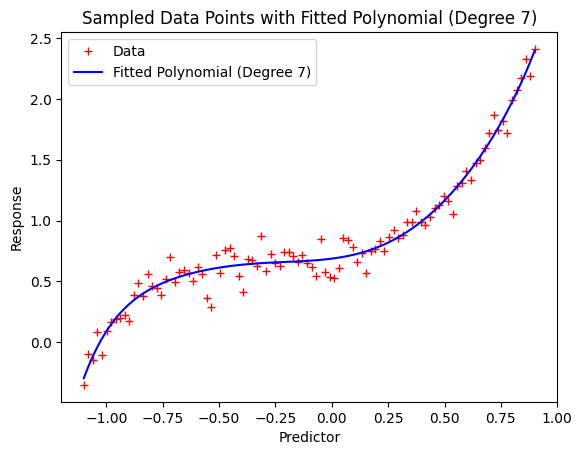

0.009041622835548936
Coefficients for a 8-degree polynomial:
[ 0.68719229  0.23737228  0.80154117  1.46051157  0.02088138 -0.98360626
 -0.02979578  0.7234366   0.04726048]


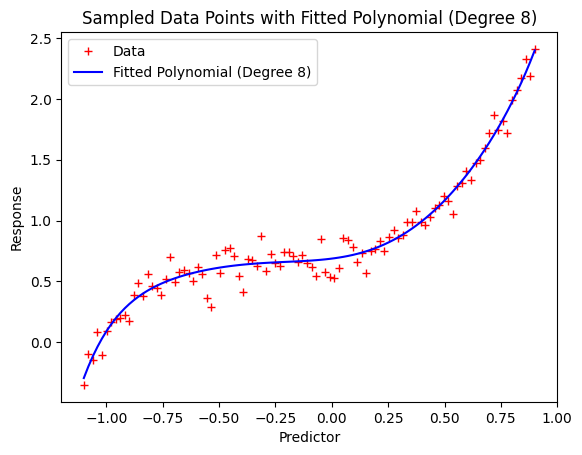

0.008852727539853951
Coefficients for a 9-degree polynomial:
[ 0.6745742   0.15025998  1.35654255  2.80231828 -3.63532131 -6.75837975
  7.48123289 10.18825836 -4.69731151 -5.27174666]


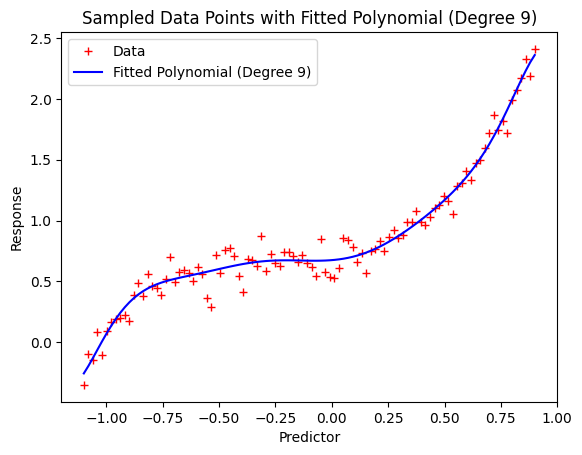

0.00885201396811835
Coefficients for a 10-degree polynomial:
[ 0.67409296  0.15891064  1.38369862  2.65125025 -3.89161657 -6.06395602
  8.35982171  9.0243801  -5.95896781 -4.62777489  0.64397177]


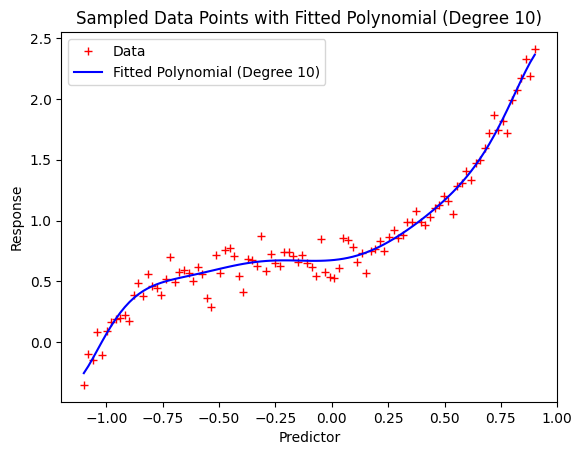

0.008424418389884659
Coefficients for a 11-degree polynomial:
[ 6.52739764e-01  4.63756746e-02  2.77349461e+00  5.25961949e+00
 -1.80073052e+01 -2.38659274e+01  5.77834180e+01  6.04130500e+01
 -7.59502555e+01 -7.08932829e+01  3.51517401e+01  3.13706985e+01]


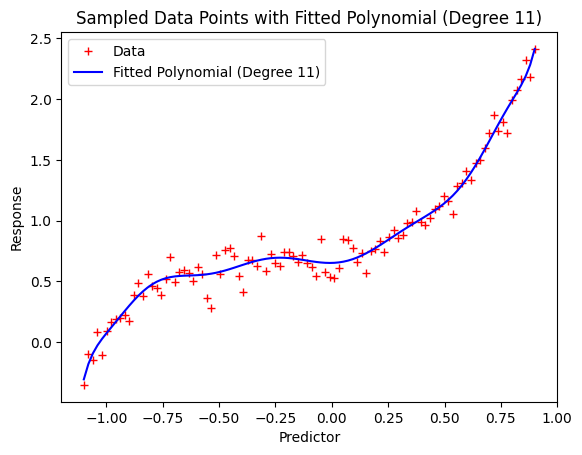

0.008333883230121707
Coefficients for a 12-degree polynomial:
[   0.6492697     0.17384346    3.05553836    2.04224261  -21.99540599
   -1.45838102   79.48414024   -2.74344359 -130.88186457    6.62215051
  100.01088295   -3.14645661  -28.76429584]


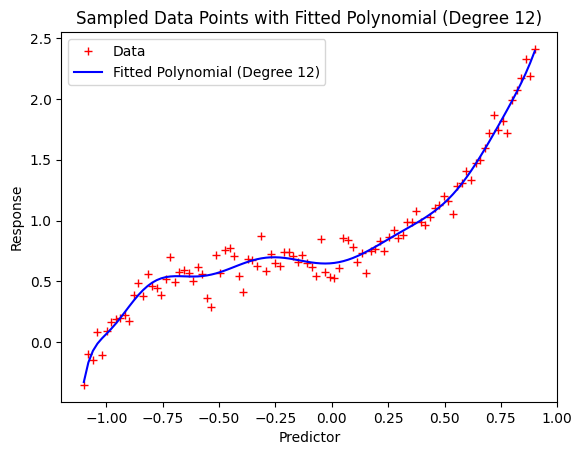

0.008330840771807192
Coefficients for a 13-degree polynomial:
[   0.64733906    0.16773108    3.22987992    2.2480515   -24.51057323
   -3.60130015   92.64953719    7.22527698 -161.90632997  -16.23394452
  133.65376114   21.96649428  -42.44300851  -10.522087  ]


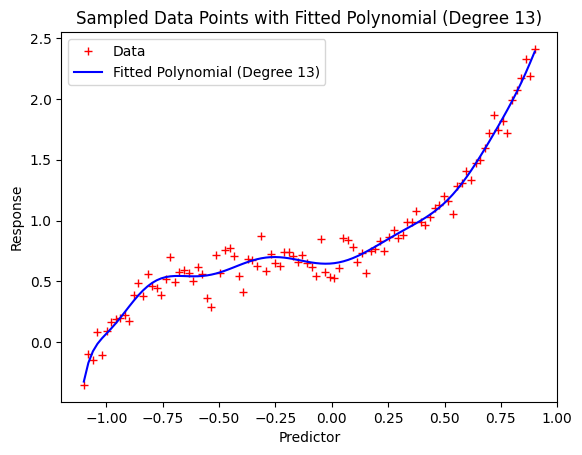

0.008297366179220828
Coefficients for a 14-degree polynomial:
[ 6.48172423e-01  7.32583732e-02  3.13317525e+00  5.49941082e+00
 -2.23849557e+01 -3.53396155e+01  7.39567348e+01  1.39563614e+02
 -8.29401202e+01 -2.84242656e+02 -3.50496342e+01  2.82643697e+02
  1.32473915e+02 -1.08169906e+02 -6.97484363e+01]


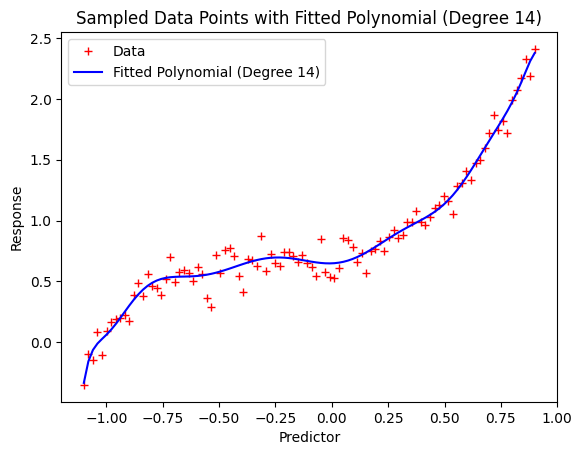

0.008265750836081895
Coefficients for a 15-degree polynomial:
[ 6.54567794e-01  7.62374705e-02  2.36772094e+00  5.27926782e+00
 -7.52660848e+00 -3.04598953e+01 -3.39211806e+01  9.67598970e+01
  2.90004719e+02 -1.08979299e+02 -6.97803957e+02 -7.58853276e+01
  7.17719583e+02  2.47048985e+02 -2.73256083e+02 -1.35671798e+02]


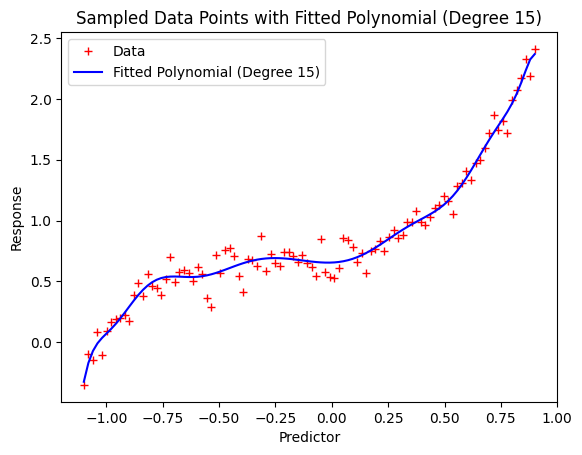

0.008244797072748283
Coefficients for a 16-degree polynomial:
[ 6.54951166e-01  1.62030449e-01  2.32428918e+00  1.41732338e+00
 -7.14538060e+00  1.97401388e+01 -2.87498349e+01 -1.91178082e+02
  2.18431174e+02  7.40729932e+02 -3.86218330e+02 -1.42271500e+03
  8.94381444e+01  1.33763217e+03  3.28582414e+02 -4.89974897e+02
 -2.21439882e+02]


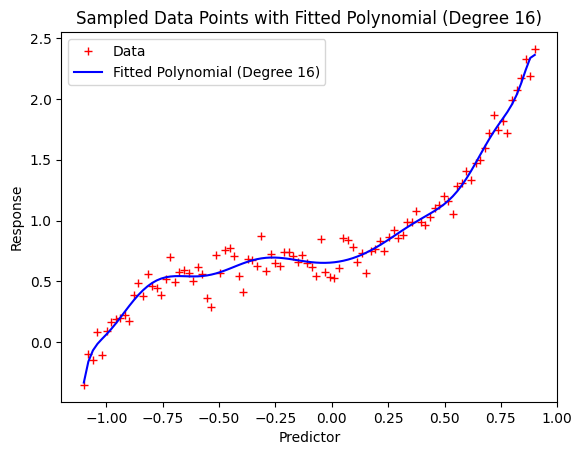

0.008180976446462214
Coefficients for a 17-degree polynomial:
[ 6.63919369e-01  1.34847909e-01  9.49314710e-01  2.61022353e+00
  2.74058733e+01  7.74910172e+00 -3.60067297e+02 -1.69276526e+02
  1.78361719e+03  9.43154218e+02 -4.41715176e+03 -2.55297813e+03
  5.86358190e+03  3.66309920e+03 -3.99476687e+03 -2.66841044e+03
  1.09809261e+03  7.76186099e+02]


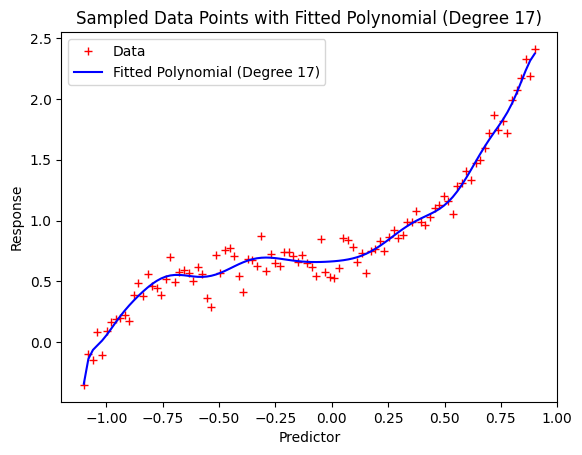

0.008141472603409331
Coefficients for a 18-degree polynomial:
[ 6.65859311e-01  2.62547001e-01  6.29998187e-01 -4.67796232e+00
  3.52605169e+01  1.29398313e+02 -4.24138669e+02 -1.08483323e+03
  1.96665146e+03  4.61549370e+03 -4.30473562e+03 -1.09510654e+04
  4.12470132e+03  1.46526583e+04 -1.74630804e+02 -1.03309056e+04
 -2.44078249e+03  2.98391154e+03  1.22667851e+03]


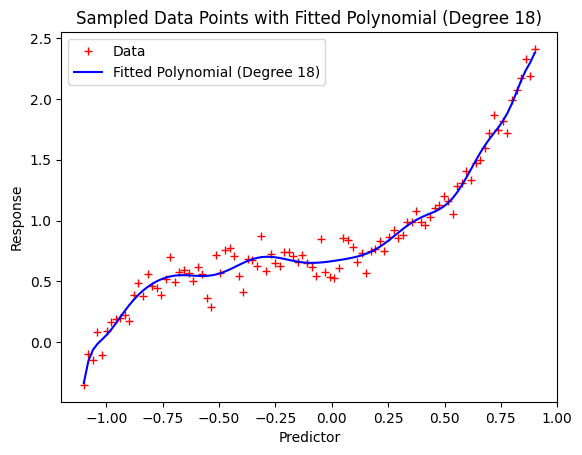

0.00791329255924044
Coefficients for a 19-degree polynomial:
[ 6.49588129e-01  3.88275719e-01  3.74184077e+00 -1.21903777e+01
 -6.30864567e+01  2.51980868e+02  7.79166792e+02 -1.90038034e+03
 -5.45450372e+03  6.96478744e+03  2.15652526e+04 -1.24285887e+04
 -4.91561967e+04  7.12900265e+03  6.41056855e+04  8.81276476e+03
 -4.44397147e+04 -1.48105494e+04  1.27001222e+04  6.03383608e+03]


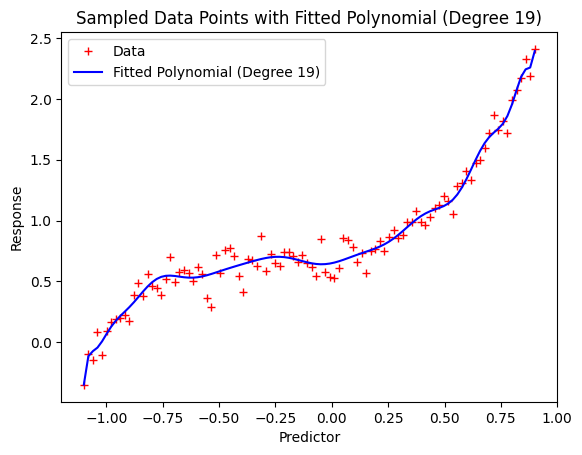

0.007866394707897496
Coefficients for a 20-degree polynomial:
[ 6.46820856e-01  2.63483306e-01  4.32312444e+00 -3.37209150e+00
 -8.21856817e+01  6.81338892e+01  1.00737136e+03 -1.46010426e+02
 -6.71211173e+03 -2.16885430e+03  2.48637751e+04  1.56958371e+04
 -5.19033643e+04 -4.55341884e+04  5.84939915e+04  6.77242992e+04
 -2.86054691e+04 -5.10056149e+04 -1.75570130e+03  1.54292387e+04
  4.74851492e+03]


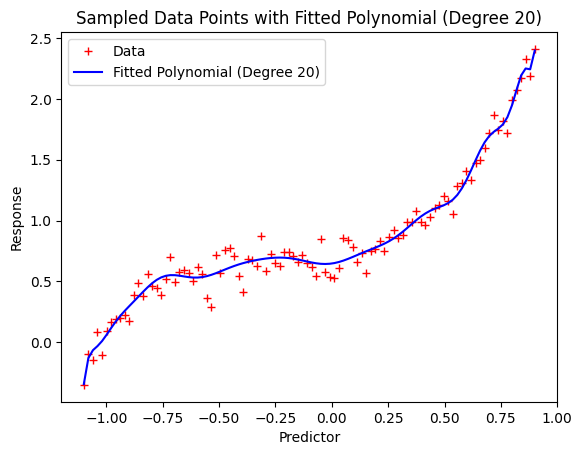

0.0079003583309223
Coefficients for a 21-degree polynomial:
[ 6.59489428e-01  4.14846645e-02  1.39286545e+00  1.27966415e+01
  3.11757081e+01 -2.69063242e+02 -7.15426456e+02  2.95351066e+03
  6.73500245e+03 -1.68942759e+04 -3.60080043e+04  5.33181093e+04
  1.17184892e+05 -9.16948914e+04 -2.34039419e+05  7.17838329e+04
  2.78713150e+05  5.91734901e+03 -1.81137069e+05 -4.56666693e+04
  4.93610816e+04  2.06666179e+04]


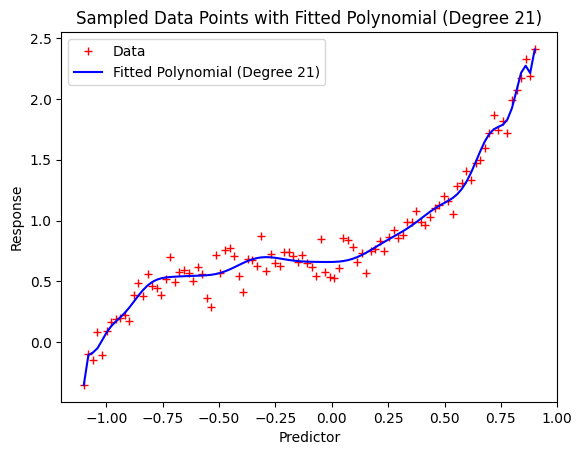

0.007823840949158674
Coefficients for a 22-degree polynomial:
[ 6.59322924e-01  1.27353239e-01  1.32802550e+00  5.40959767e+00
  3.67246826e+01 -8.21489076e+01 -8.28240157e+02  7.77275963e+02
  7.67513325e+03 -2.87980118e+03 -3.96518450e+04 -1.34174151e+03
  1.22446689e+05  4.29742036e+04 -2.26650717e+05 -1.39284248e+05
  2.38368498e+05  2.10095621e+05 -1.17481081e+05 -1.56842223e+05
  3.00513021e+03  4.67326925e+04  1.32329527e+04]


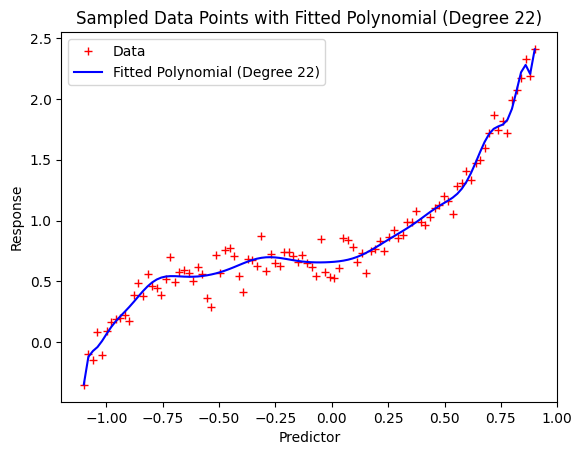

0.0077960743270305
Coefficients for a 23-degree polynomial:
[ 6.54808548e-01  1.62535400e-01  2.39411056e+00  3.12391625e+00
 -5.23306081e+00 -4.29469524e+01 -1.82062258e+02  5.39985676e+02
  2.58175116e+03 -2.77557245e+03 -1.64265748e+04  3.81919570e+03
  5.75263375e+04  1.65327948e+04 -1.13485858e+05 -7.59943319e+04
  1.17930348e+05  1.26203194e+05 -4.50987993e+04 -9.57265778e+04
 -1.67463899e+04  2.53444879e+04  1.40366508e+04  2.22963847e+03]


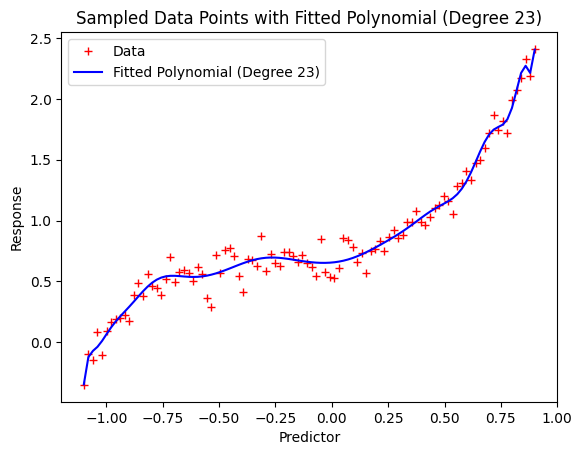

0.007786503720816247
Coefficients for a 24-degree polynomial:
[ 6.55873889e-01  1.73937817e-01  2.15754323e+00  2.04954613e+00
  3.20742346e+00 -1.40745732e+01 -2.93406404e+02  1.94831670e+02
  3.26203066e+03 -5.94317155e+02 -1.83391624e+04 -3.95293957e+03
  5.84783591e+04  3.16966587e+04 -1.04895542e+05 -8.78393820e+04
  9.39498654e+04  1.15608120e+05 -1.88168610e+04 -6.40295908e+04
 -2.62101496e+04 -1.03856323e+03  1.00398596e+04  1.01168607e+04
  2.96887603e+03]


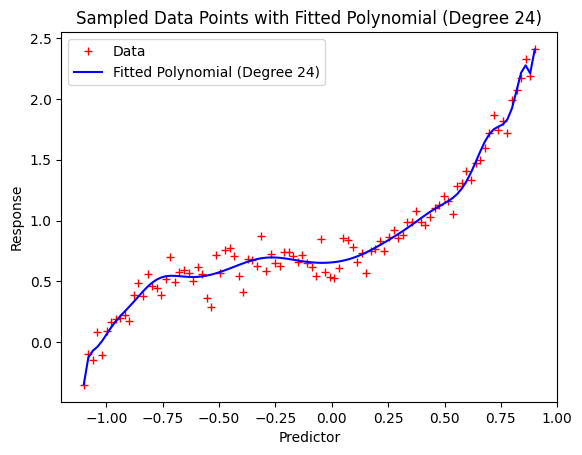

0.008184494513915409
Coefficients for a 25-degree polynomial:
[ 6.62011687e-01 -7.02643899e-02  5.48826468e-01  2.18578838e+01
  7.40314202e+01 -4.81169125e+02 -1.52189987e+03  5.14055989e+03
  1.41993376e+04 -2.83901814e+04 -7.43872173e+04  8.42072327e+04
  2.30787460e+05 -1.21794304e+05 -4.14209696e+05  2.55777953e+04
  3.58694596e+05  1.59474214e+05  3.76726173e+04 -1.75965021e+05
 -3.72973006e+05  2.45720397e+02  3.04782588e+05  8.86198207e+04
 -8.30995080e+04 -3.66359990e+04]


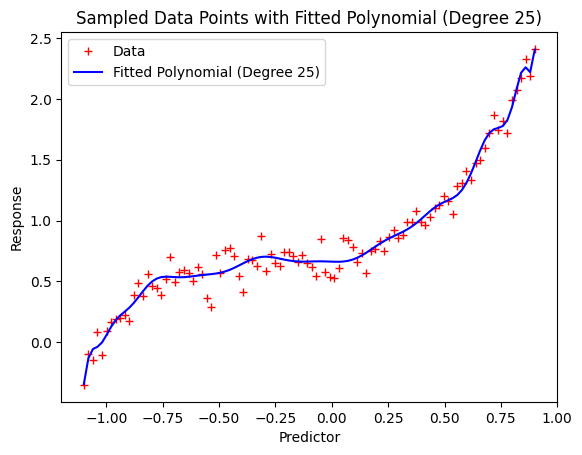

In [41]:
# Fit a line (simple linear regression)
n = len(predictor_low)
x_bar = np.mean(predictor_low)
y_bar = np.mean(response_low)

beta_1 = np.sum((predictor_low - x_bar) * (response_low - y_bar)) / np.sum((predictor_low - x_bar)**2)
beta_0 = y_bar - beta_1 * x_bar

# Print the coefficients
print("beta_0:", beta_0)
print("beta_1:", beta_1)

# Plot the data and the fitted line
plt.plot(predictor_low, response_low, 'r+')
plt.plot(predictor_low, beta_1 * predictor_low + beta_0, 'b-', label='Fitted Line')
plt.xlabel('Predictor_low')
plt.ylabel('Response_low')
plt.title('Sampled Data Points with Fitted Line')
plt.legend()
plt.show()



min_error = float('inf')
best_degree = -1

for degree in range(26):
    # Create the matrix X with predictor values up to the chosen degree
    X = np.column_stack([predictor_low**i for i in range(degree + 1)])

    # Solve the normal equations to find coefficients
    beta = np.linalg.solve(X.T @ X, X.T @ response_low)

    # Calculate the predicted values
    y_pred = X @ beta

    # Calculate the mean squared error
    error = np.mean((response_low - y_pred)**2)
    print(error)

    print(f"Coefficients for a {degree}-degree polynomial:\n{beta}")
    # Update best_degree if the current degree gives lower error
    if error < min_error:
        min_error = error
        best_degree = degree

    # Print coefficients for a 25-degree polynomial
    if degree == len(true_coeff_low):
        print(f"Axtual Coefficients of given polynomial:\n{true_coeff_low}")
        print(f"Axtual degree of given polynomial:\n{len(true_coeff_low)-1}")

    # Plot the data and the fitted polynomial
    plt.figure()
    plt.plot(predictor_low, response_low, 'r+', label='Data')
    plt.plot(predictor_low, y_pred, 'b-', label=f'Fitted Polynomial (Degree {degree})')
    plt.xlabel('Predictor')
    plt.ylabel('Response')
    plt.title(f'Sampled Data Points with Fitted Polynomial (Degree {degree})')
    plt.legend()
    plt.show()

# Print the best degree
# print(f"Best degree that minimizes error: {best_degree}")

Error with L1 :
0.14767095055595938
Error with L2 :
0.14767095055595938
Coefficients for L1 regularization:
[0.82426465]
Coefficients for L2 regularization:
[0.82426465]


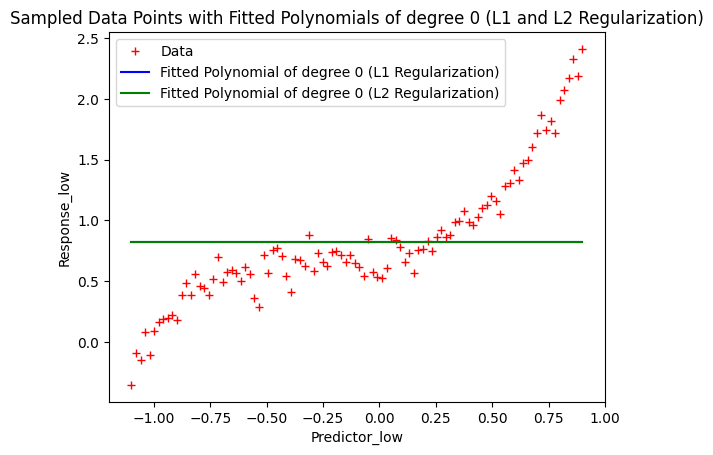

Error with L1 :
0.03889857801235128
Error with L2 :
0.037337669871534244
Coefficients for L1 regularization:
[0.90424657 0.79981917]
Coefficients for L2 regularization:
[0.9048184  0.80553754]


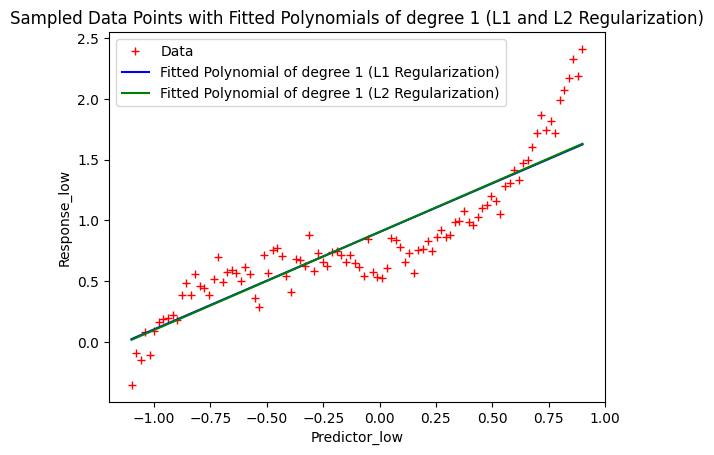

Error with L1 :
0.03448825851979227
Error with L2 :
0.03128071771978935
Coefficients for L1 regularization:
[0.80366508 0.86062621 0.30499803]
Coefficients for L2 regularization:
[0.78078268 0.87829871 0.37539624]


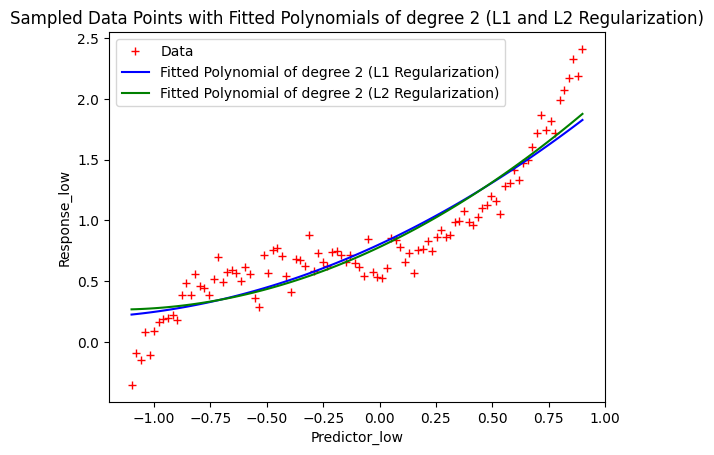

Error with L1 :
0.025570692141922466
Error with L2 :
0.018413981111892602
Coefficients for L1 regularization:
[0.76925348 0.48651222 0.48895028 0.6509918 ]
Coefficients for L2 regularization:
[0.74710851 0.47491874 0.56816606 0.71682769]


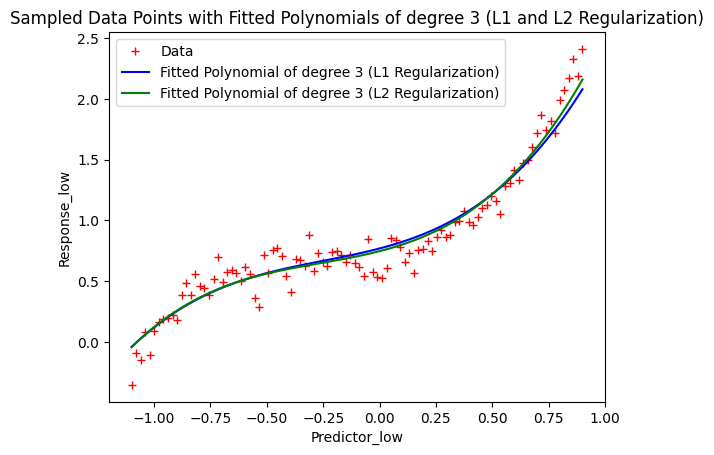

Error with L1 :
0.02556615235799494
Error with L2 :
0.018231644455051862
Coefficients for L1 regularization:
[ 7.69971170e-01  4.85070307e-01  4.87033693e-01  6.52331514e-01
 -1.25828304e-05]
Coefficients for L2 regularization:
[0.75352418 0.465051   0.49915905 0.74452212 0.08580515]


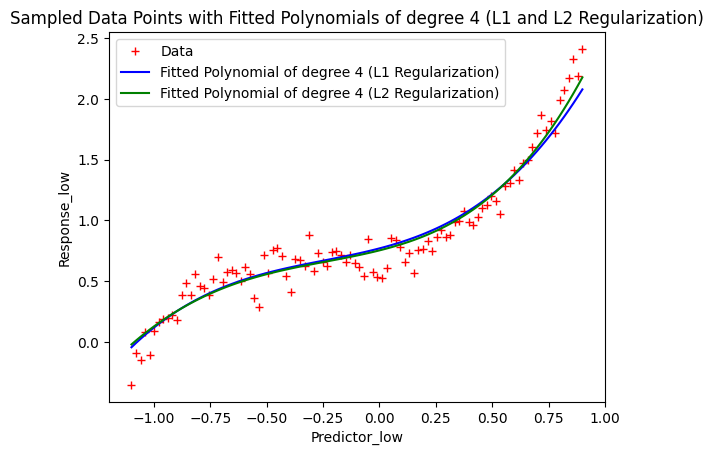

Error with L1 :
0.025408785228287115
Error with L2 :
0.014949834368799875
Coefficients for L1 regularization:
[0.76323213 0.48268693 0.51484235 0.4281587  0.02781255 0.30438828]
Coefficients for L2 regularization:
[0.73900396 0.43569941 0.50844411 0.48362448 0.21635321 0.45125584]


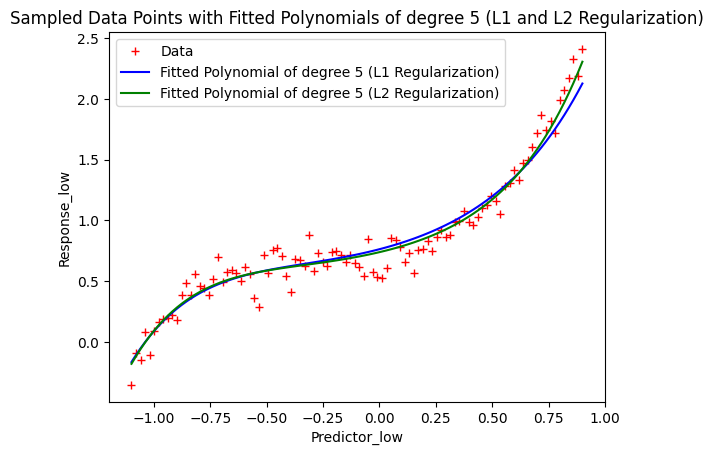

Error with L1 :
0.025408910595298206
Error with L2 :
0.014939448615542934
Coefficients for L1 regularization:
[7.63222621e-01 4.82684914e-01 5.14917189e-01 4.28121599e-01
 2.77187603e-02 3.04436003e-01 8.03900418e-05]
Coefficients for L2 regularization:
[0.73985081 0.4335462  0.50663714 0.48413499 0.20911302 0.45569675
 0.00982459]


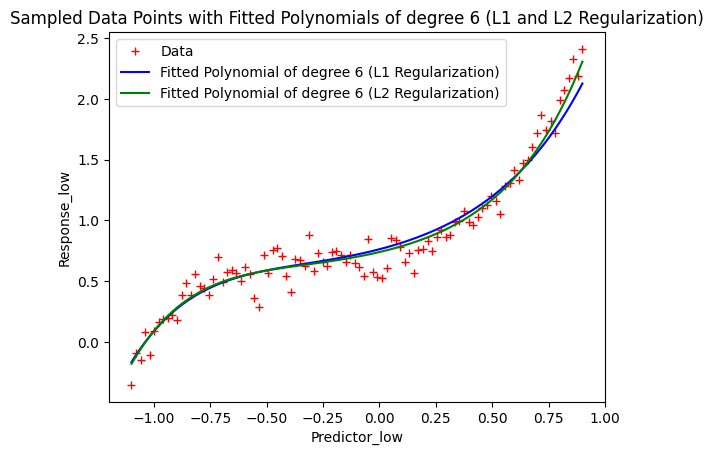

Error with L1 :
0.02569236962778982
Error with L2 :
0.01387292332320678
Coefficients for L1 regularization:
[7.61596842e-01 5.04648711e-01 5.03678962e-01 3.85448879e-01
 6.14411025e-02 2.20159861e-01 1.24248588e-04 1.19312530e-01]
Coefficients for L2 regularization:
[0.73628667 0.44879215 0.48319568 0.40566054 0.24162193 0.32666856
 0.0950109  0.28060602]


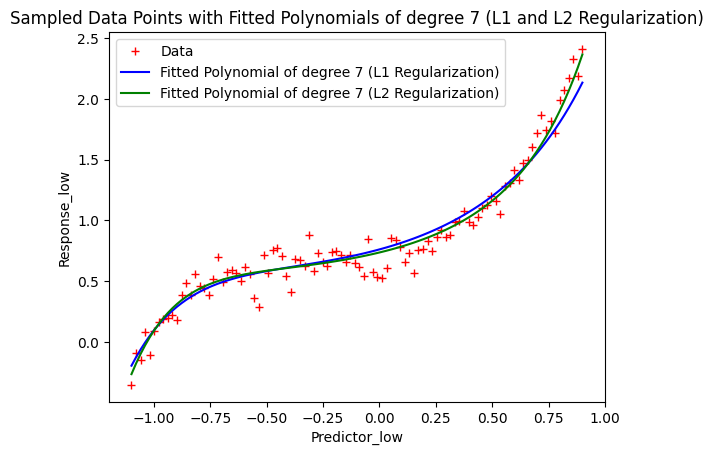

Error with L1 :
0.02569256332144329
Error with L2 :
0.013873696510822594
Coefficients for L1 regularization:
[ 7.61595773e-01  5.04649924e-01  5.03681315e-01  3.85445568e-01
  6.14362924e-02  2.20160377e-01  1.13901720e-04  1.19318364e-01
 -2.63069512e-05]
Coefficients for L2 regularization:
[ 0.73620649  0.44879538  0.48389825  0.40520819  0.24184698  0.32640458
  0.09484344  0.28065012 -0.00150286]


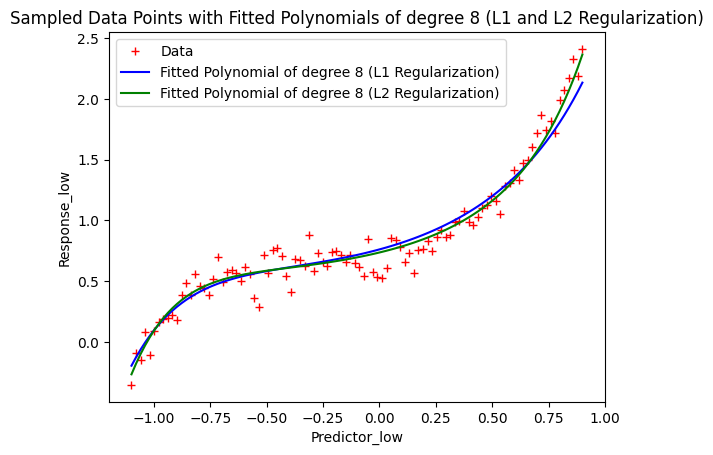

Error with L1 :
0.025750200126185015
Error with L2 :
0.013497983434565018
Coefficients for L1 regularization:
[7.62344015e-01 5.12886397e-01 4.96538046e-01 3.84498135e-01
 6.71291160e-02 2.05938816e-01 1.25381050e-04 9.22092973e-02
 9.79089297e-05 2.87026746e-02]
Coefficients for L2 regularization:
[0.73663981 0.46117909 0.4627236  0.38519577 0.24390698 0.2815139
 0.12293346 0.21416256 0.05253683 0.17145593]


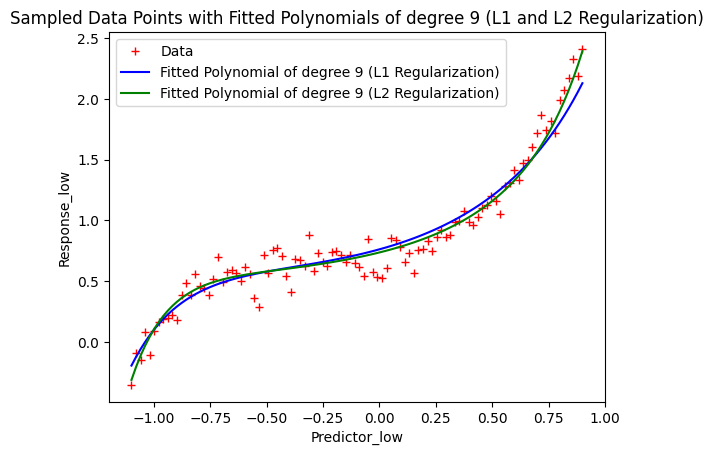

Error with L1 :
0.02574955183085495
Error with L2 :
0.013496407388149908
Coefficients for L1 regularization:
[ 7.62347219e-01  5.12869082e-01  4.96520905e-01  3.84536471e-01
  6.71504912e-02  2.05960087e-01 -1.99736417e-05  9.21967535e-02
 -1.62221975e-05  2.86507859e-02  6.70066316e-05]
Coefficients for L2 regularization:
[0.73673906 0.46072036 0.46266934 0.38505689 0.24310957 0.28201747
 0.1214995  0.21534754 0.05050161 0.17334061 0.00669229]


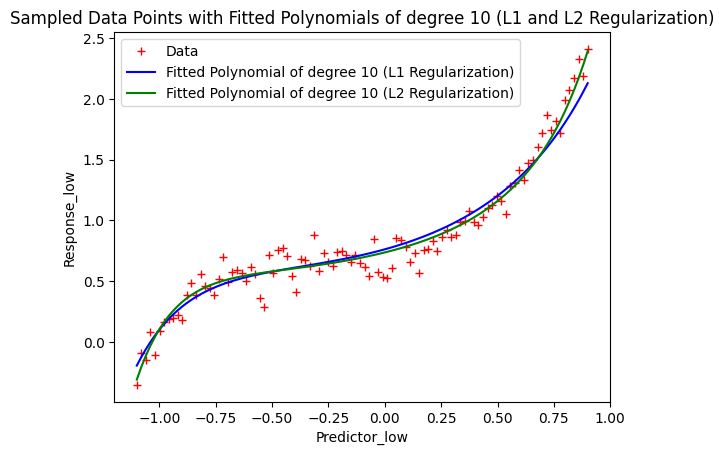

Error with L1 :
0.025741559417241967
Error with L2 :
0.013367267515666376
Coefficients for L1 regularization:
[ 7.63084832e-01  5.12408049e-01  4.94338198e-01  3.87425102e-01
  6.62116141e-02  2.07237811e-01  1.22860703e-05  9.08528615e-02
 -2.12698176e-05  2.43226340e-02 -5.30796107e-05  1.80988294e-04]
Coefficients for L2 regularization:
[0.73809711 0.46642219 0.44966549 0.38278295 0.23787848 0.26917661
 0.12779796 0.19175242 0.06949931 0.13843013 0.03929516 0.09934322]


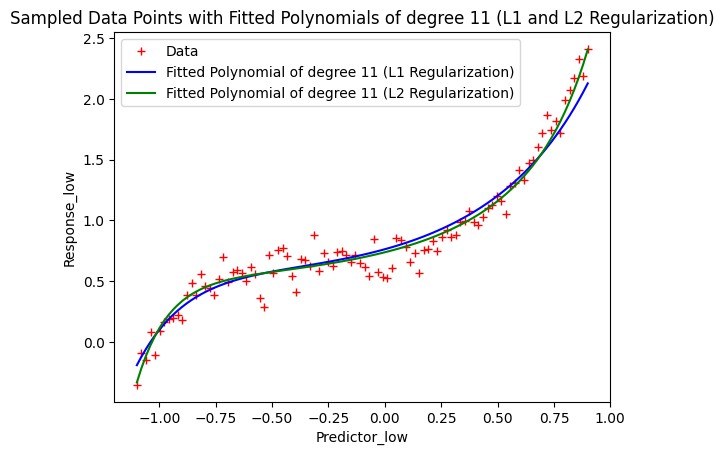

Error with L1 :
0.025743058505832847
Error with L2 :
0.013361557145538218
Coefficients for L1 regularization:
[ 7.63087288e-01  5.12366335e-01  4.94327675e-01  3.87481864e-01
  6.62497959e-02  2.07277263e-01  9.70299959e-05  9.08428938e-02
 -8.89818834e-05  2.42504961e-02 -6.82970125e-05  3.84719359e-05
 -5.91897674e-05]
Coefficients for L2 regularization:
[0.73824942 0.46542139 0.45011706 0.38192846 0.23694215 0.26956565
 0.12548604 0.19362749 0.06579532 0.14191179 0.03409956 0.10456675
 0.01844128]


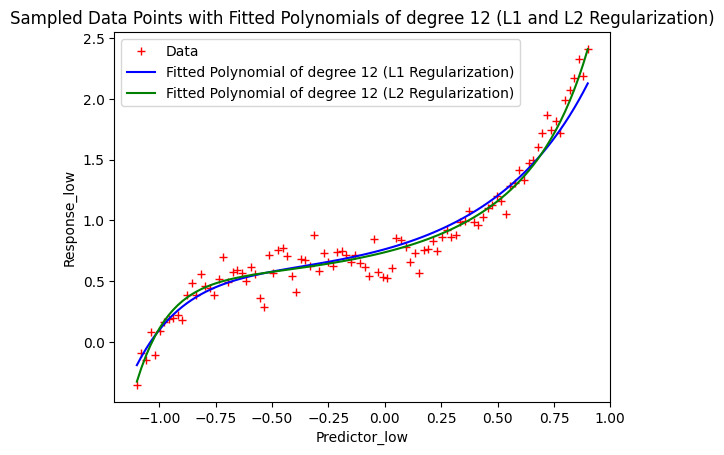

Error with L1 :
0.02573939266634876
Error with L2 :
0.013320597208839446
Coefficients for L1 regularization:
[ 7.63160952e-01  5.11746272e-01  4.94174872e-01  3.88394215e-01
  6.61344419e-02  2.07939540e-01  5.26439318e-05  9.07773188e-02
 -2.45619018e-05  2.32499417e-02 -1.14942037e-04  1.50329396e-04
 -4.00504582e-05  7.78786217e-05]
Coefficients for L2 regularization:
[0.73938455 0.46695289 0.44399478 0.38359658 0.23209086 0.26772428
 0.12478548 0.18728622 0.07046357 0.13038734 0.04496008 0.08709082
 0.03632279 0.05146472]


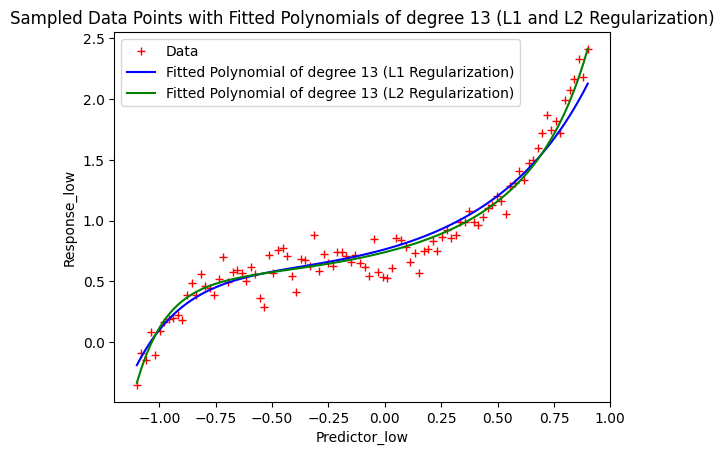

Error with L1 :
0.02574091635893092
Error with L2 :
0.013311876116115652
Coefficients for L1 regularization:
[ 7.63158405e-01  5.11713128e-01  4.94166158e-01  3.88459414e-01
  6.61713850e-02  2.07983400e-01 -5.76525199e-05  9.07616436e-02
 -7.50597285e-05  2.31569390e-02 -9.59306782e-05  1.67189282e-04
 -1.38954496e-04  1.91599460e-04 -6.97669427e-05]
Coefficients for L2 regularization:
[0.73939921 0.46600619 0.44517791 0.38177607 0.2319971  0.26708772
 0.12310434 0.18842129 0.06701102 0.13359437 0.03951214 0.0926372
 0.02858603 0.05966305 0.02792361]


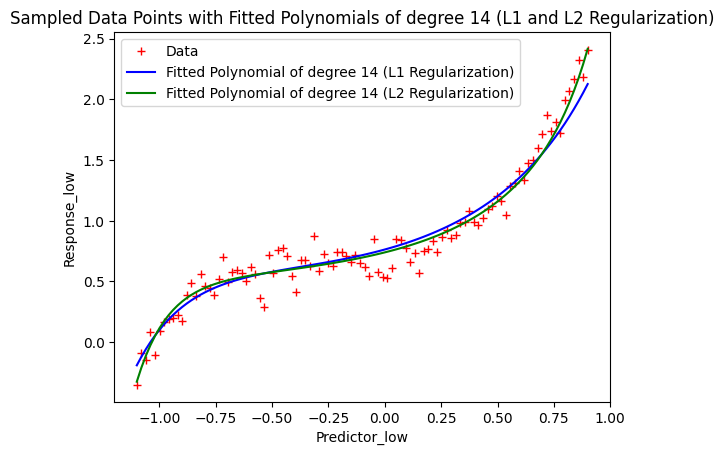

Error with L1 :
0.025737013115840222
Error with L2 :
0.01330050072814298
Coefficients for L1 regularization:
[ 7.62953404e-01  5.12505207e-01  4.94192310e-01  3.88875431e-01
  6.73392126e-02  2.07007139e-01  1.10407564e-04  8.81142902e-02
  8.66952878e-05  1.86544246e-02 -1.20618924e-04 -3.14800579e-06
 -7.73716999e-05  7.76465715e-05  1.77206275e-05  5.78699654e-03]
Coefficients for L2 regularization:
[0.74002729 0.46578421 0.44332336 0.3831836  0.22936406 0.26791953
 0.12132728 0.18790754 0.06691187 0.1312555  0.04163044 0.08803471
 0.0333962  0.0523174  0.03593175 0.02052501]


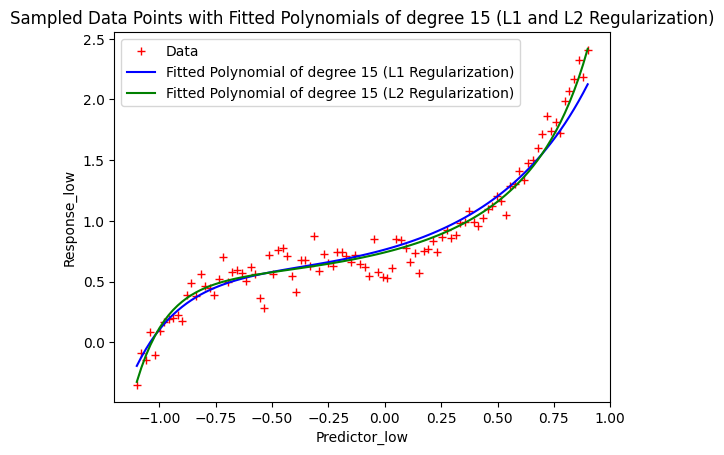

Error with L1 :
0.0257362738927835
Error with L2 :
0.013291020232319721
Coefficients for L1 regularization:
[ 7.62955584e-01  5.12471438e-01  4.94184965e-01  3.88942062e-01
  6.73647771e-02  2.07055397e-01 -1.32346216e-05  8.81015085e-02
  2.75983079e-05  1.85583679e-02 -1.00716734e-04  5.21452750e-07
  3.82048387e-05  1.63812075e-04 -1.51261052e-04  5.73571053e-03
 -1.66533749e-04]
Coefficients for L2 regularization:
[0.73986945 0.4653337  0.44475606 0.38080802 0.23017723 0.26619659
 0.12089102 0.18770128 0.06485061 0.1330295  0.03759694 0.09216827
 0.02700387 0.05921349 0.02672303 0.03065954 0.0333493 ]


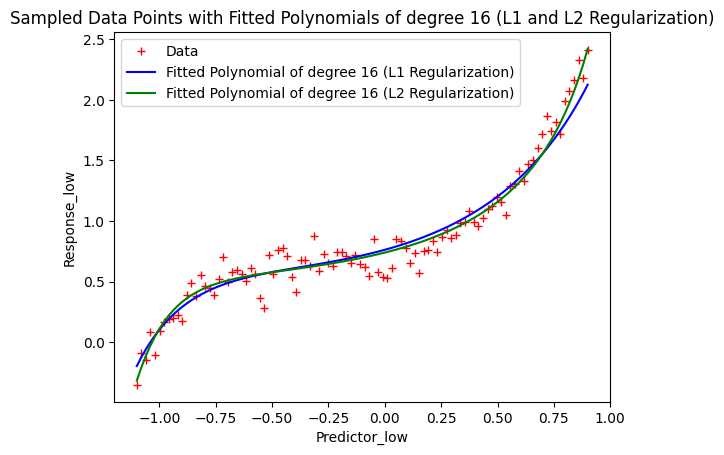

Error with L1 :
0.025718495825415494
Error with L2 :
0.013288659036995883
Coefficients for L1 regularization:
[ 7.62633617e-01  5.14439428e-01  4.93962264e-01  3.89686982e-01
  6.95195832e-02  2.05101843e-01  3.31616753e-05  8.30461825e-02
  4.32857339e-05  1.00978994e-02  5.45206572e-05  1.54887197e-04
  2.01807783e-05  2.80977952e-05 -1.23107876e-04  5.64185126e-05
 -1.21837326e-04  1.44938700e-02]
Coefficients for L2 regularization:
[0.74006324 0.46477574 0.44492742 0.38121972 0.22947342 0.26687345
 0.11993446 0.18831837 0.06401412 0.13337899 0.03712264 0.09207915
 0.02708253 0.05851847 0.02753502 0.02917722 0.03508785 0.00182227]


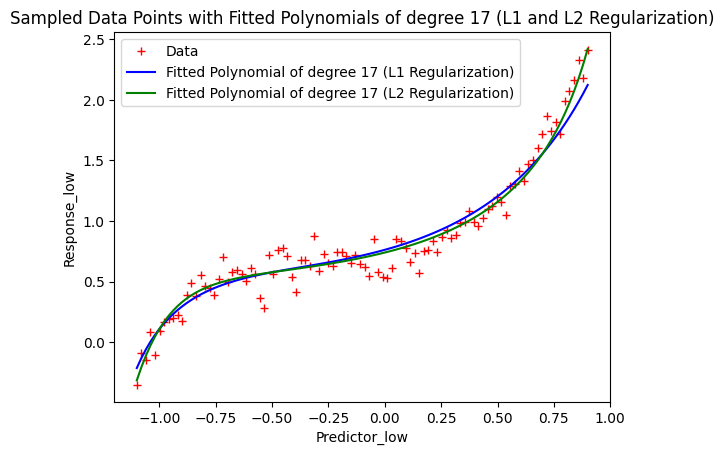

Error with L1 :
0.02571885397703872
Error with L2 :
0.01328044470347593
Coefficients for L1 regularization:
[ 7.62633903e-01  5.14413436e-01  4.93951986e-01  3.89752934e-01
  6.95362482e-02  2.05148836e-01  9.95824029e-05  8.30312365e-02
 -2.30456498e-05  9.99675770e-03  7.28717412e-05  1.48000143e-04
 -5.73503952e-05  9.53542714e-05 -7.38609740e-05  1.74612910e-04
 -1.18883183e-04  1.44350859e-02 -6.04451642e-05]
Coefficients for L2 regularization:
[0.73980605 0.46492821 0.44606757 0.37887871 0.23075293 0.26454094
 0.12056605 0.18695887 0.0634964  0.13354089 0.03503269 0.09419848
 0.02299099 0.0630329  0.02096213 0.03658186 0.02547294 0.01270561
 0.03461943]


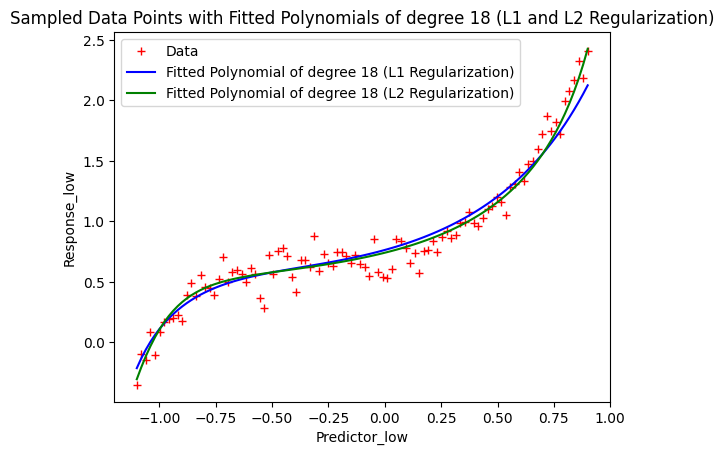

Error with L1 :
0.025687626883821278
Error with L2 :
0.01328062704223662
Coefficients for L1 regularization:
[ 7.62432789e-01  5.16546441e-01  4.93191604e-01  3.91211532e-01
  7.13594958e-02  2.03697174e-01 -1.53025277e-07  7.80121766e-02
 -4.66555329e-05  9.59144587e-04  1.70647508e-05  1.80763319e-04
 -1.20413318e-04  1.49444514e-04  3.83522424e-05  2.50831518e-05
 -6.49229819e-05  4.93145710e-05 -8.19296748e-05  2.01115362e-02]
Coefficients for L2 regularization:
[ 0.73974623  0.46462249  0.44679794  0.3786398   0.23112498  0.26453195
  0.12059041  0.18719549  0.06321446  0.1340253   0.03446593  0.09493834
  0.02214195  0.06404458  0.01981809  0.03789103  0.02400827  0.01434764
  0.03279653 -0.00798465]


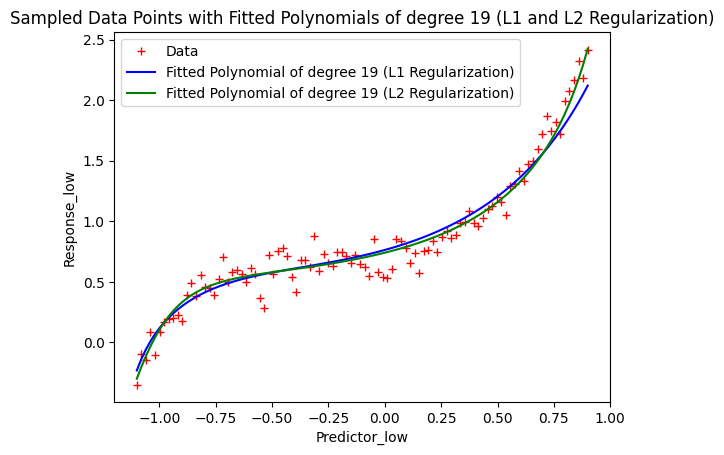

Error with L1 :
0.02568665826678994
Error with L2 :
0.01327474811880322
Coefficients for L1 regularization:
[ 7.62431248e-01  5.16501553e-01  4.93187010e-01  3.91270708e-01
  7.13611226e-02  2.03758345e-01  3.11856603e-05  7.80324102e-02
  3.31708410e-05  9.13462150e-04 -3.67512301e-05  4.93756425e-05
 -8.88115114e-05  1.12669660e-04 -2.30261736e-05  6.08041902e-05
  5.98397896e-06  1.31336568e-04 -4.86967907e-05  2.00082187e-02
 -1.89424252e-04]
Coefficients for L2 regularization:
[0.73949084 0.46523046 0.44734674 0.37679024 0.23236238 0.26219344
 0.12176589 0.18525221 0.0638044  0.13301563 0.03403971 0.09529026
 0.02028388 0.06617433 0.0160822  0.04225509 0.01788647 0.02147764
 0.02369121 0.00254737 0.03233504]


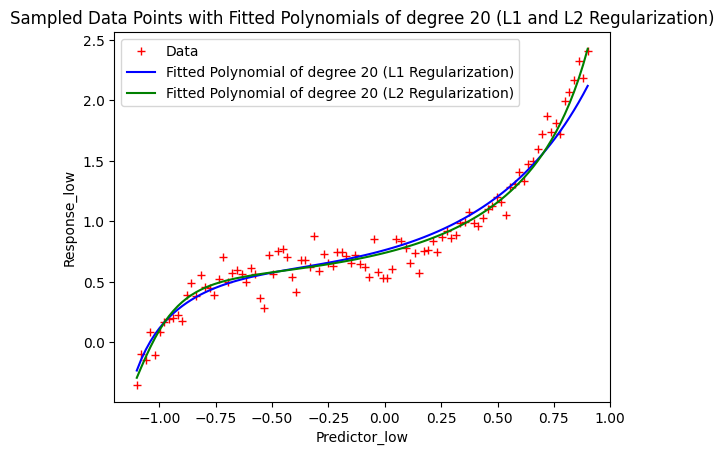

Error with L1 :
0.025664187030972944
Error with L2 :
0.013275630495123349
Coefficients for L1 regularization:
[ 7.62416196e-01  5.17810238e-01  4.92467887e-01  3.92512349e-01
  7.31231351e-02  2.02265853e-01  9.46521366e-05  7.29592619e-02
  9.16445485e-05  8.92308837e-05 -8.59382390e-06  6.57747758e-05
  1.78556589e-05  2.59718031e-05  3.71029332e-05  1.43423559e-04
 -1.07138120e-04  3.27380028e-05 -2.56353952e-05  1.13012007e-04
 -3.88160043e-05  2.09436968e-02]
Coefficients for L2 regularization:
[ 0.73934734  0.4652622   0.44789354  0.37638849  0.23304066  0.26176853
  0.12233575  0.18497438  0.06413569  0.13299491  0.03403547  0.09562269
  0.01985178  0.06695966  0.01512104  0.04360631  0.01627786  0.02352786
  0.0212929   0.00545627  0.02897438 -0.0114225 ]


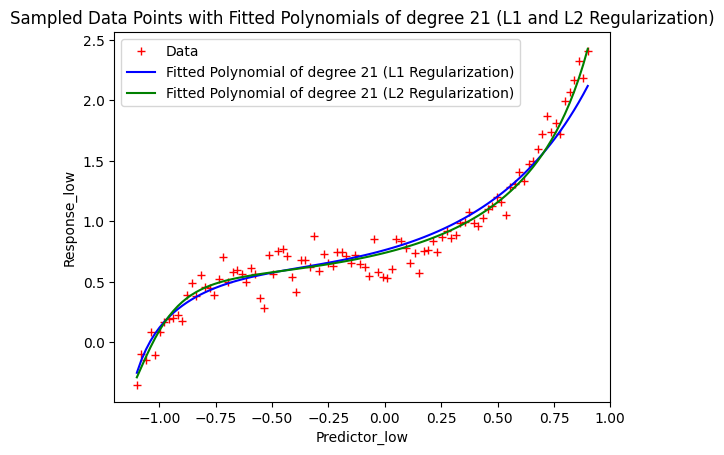

Error with L1 :
0.025664111141639766
Error with L2 :
0.013272108858842994
Coefficients for L1 regularization:
[ 7.62473883e-01  5.17624456e-01  4.92387704e-01  3.92696467e-01
  7.30033764e-02  2.02532456e-01 -1.81199552e-05  7.32075397e-02
  1.78976258e-05  6.96269599e-05 -1.50962848e-05  1.44957694e-04
 -9.27833911e-05  1.74358404e-04  5.37572599e-05  1.29575807e-04
 -1.27086385e-04  2.01645002e-05 -3.96473901e-05  5.78033164e-05
  3.94959795e-06  2.05923431e-02 -1.53595894e-04]
Coefficients for L2 regularization:
[ 0.73917057  0.46606552  0.4478362   0.3752404   0.23389336  0.25989259
  0.1235279   0.18304879  0.06521594  0.13147014  0.0346285   0.09486415
  0.01960323  0.06731797  0.01366049  0.04545824  0.0131913   0.02730537
  0.01609885  0.01167146  0.02110032 -0.0021525   0.02735107]


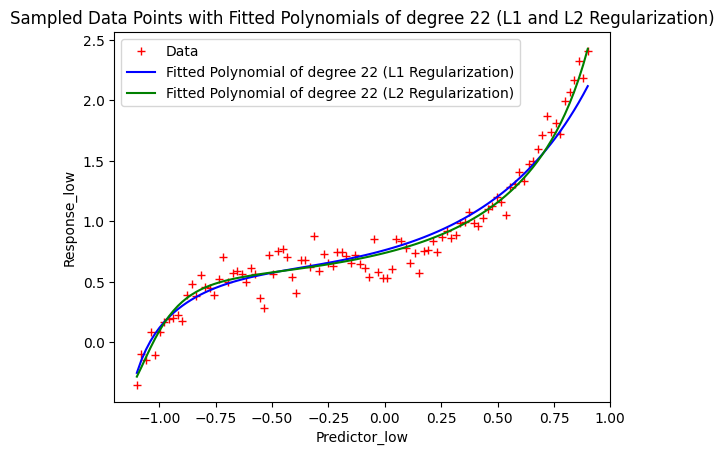

Error with L1 :
0.025643566331711852
Error with L2 :
0.013273006137629348
Coefficients for L1 regularization:
[ 7.62369025e-01  5.18660071e-01  4.91692186e-01  3.93692409e-01
  7.43237297e-02  2.01258047e-01  1.23736237e-04  6.89005045e-02
  6.26491203e-05 -8.78980412e-06  7.53361877e-05  1.20728881e-04
 -9.93054753e-05  1.10007753e-04 -4.52506407e-05  1.66764467e-04
 -1.35496291e-04  9.98161114e-05  4.02038956e-05  8.06420643e-05
  2.72311727e-05  1.72412287e-04 -2.24069471e-05  1.96750925e-02]
Coefficients for L2 regularization:
[ 0.73905574  0.46629086  0.44798176  0.37498836  0.23440556  0.25944267
  0.12415984  0.18257233  0.06580119  0.13109386  0.03504121  0.09469955
  0.0197307   0.06747696  0.01338726  0.04606314  0.01238862  0.02849686
  0.01461631  0.01361596  0.01875794  0.0007449   0.02393101 -0.01046821]


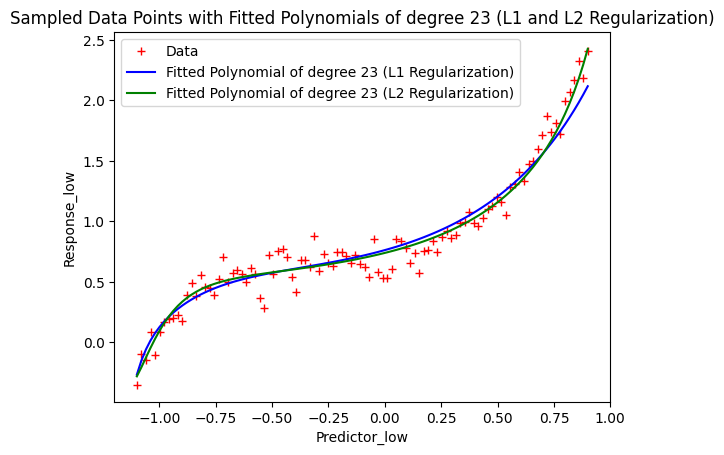

Error with L1 :
0.02564194239697138
Error with L2 :
0.013271129303460104
Coefficients for L1 regularization:
[ 7.62421240e-01  5.18524148e-01  4.91558126e-01  3.94076469e-01
  7.42447695e-02  2.01640807e-01 -1.77309966e-05  6.91010065e-02
 -7.57938932e-05  1.12291401e-04  7.04818503e-06  8.60712208e-05
 -2.22634192e-05  4.21054648e-05 -1.35424427e-04 -2.33375367e-05
 -8.91974594e-05  8.06209818e-05 -5.28234061e-05  1.02055072e-04
 -5.55023226e-05  7.51367679e-05 -1.14037991e-04  1.54645185e-02
 -3.48304495e-03]
Coefficients for L2 regularization:
[ 0.73898989  0.46703607  0.44750329  0.37451912  0.23475926  0.2582591
  0.12501596  0.18109614  0.06683962  0.12964341  0.03598358  0.0935442
  0.02031394  0.06687583  0.01333967  0.04629177  0.01141015  0.02986787
  0.01236078  0.01649754  0.01481521  0.00557957  0.01780765 -0.00314307
  0.02056656]


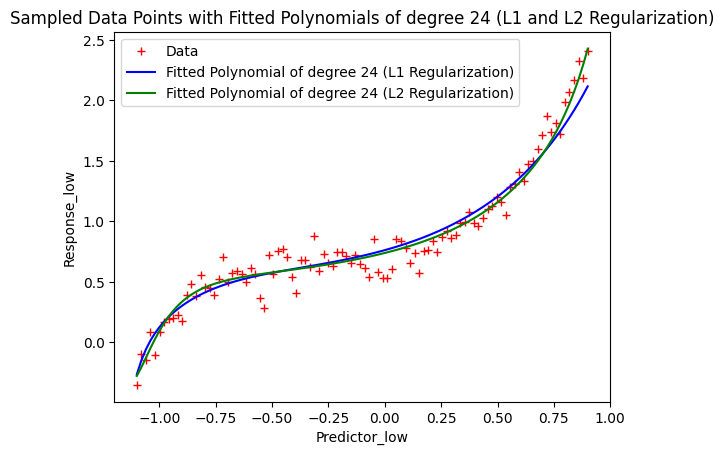

Error with L1 :
0.02561858939466473
Error with L2 :
0.0132715083348734
Coefficients for L1 regularization:
[ 7.62384796e-01  5.19201006e-01  4.90987898e-01  3.94740210e-01
  7.50457000e-02  2.00672873e-01  9.36666879e-05  6.59043900e-02
 -3.51594260e-05  4.39658245e-05  2.92145972e-05  7.20998957e-05
 -8.31269062e-05  1.14761667e-04 -3.06927200e-05  3.94870803e-05
 -2.95277385e-05  7.83902390e-05 -7.78882593e-05 -1.17209207e-05
  1.47498545e-06  1.73862562e-04 -1.59354117e-04  2.43437648e-05
 -1.14968344e-04  1.77764359e-02]
Coefficients for L2 regularization:
[ 0.73895153  0.46726491  0.44733487  0.37450779  0.23493496  0.25803323
  0.12539897  0.18074572  0.06731139  0.12925402  0.03644895  0.09319641
  0.02068786  0.06665094  0.01353703  0.0462776   0.01133824  0.03016416
  0.01191292  0.01722139  0.01386479  0.00687119  0.01620178 -0.00111385
  0.01811899 -0.00668993]


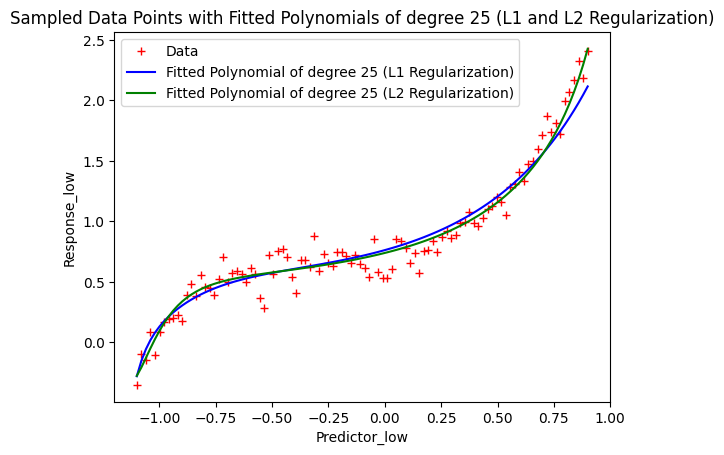

In [64]:
def polynomial_regression(X, beta):
    return np.sum(X * beta, axis=1)

def objective_function(beta, X, y, alpha, regularization_type):
    # n = len(y)
    error = np.sum((y - polynomial_regression(X, beta))**2) / (2 * len(y))
    # print(f"Error:\n{error}")
    if regularization_type == 'L1':
        regularization_term = alpha * np.sum(np.abs(beta[1:]))
    elif regularization_type == 'L2':
        regularization_term = alpha * np.sum(beta[1:]**2)
    else:
        regularization_term = 0

    return error + regularization_term

def gradient_descent(X, y, alpha, regularization_type, learning_rate=0.01, num_iterations=5000):
    n, p = X.shape
    beta = np.zeros(p)

    for _ in range(num_iterations):
        # Calculate the gradient of the objective function
        gradient = np.dot(X.T, polynomial_regression(X, beta) - y) / n

        # Update beta using the gradient and learning rate
        if regularization_type == 'L1':
            regularization_term = alpha * np.sign(beta[1:])
            gradient[1:] += regularization_term
        elif regularization_type == 'L2':
            regularization_term = alpha * beta[1:]
            gradient[1:] += regularization_term

        # Update beta using the gradient and learning rate
        beta -= learning_rate * gradient

        # Optionally, print the value of the objective function for monitoring
        objective_value = objective_function(beta, X, y, alpha, regularization_type)
        # print(f"Iteration {_ + 1}, Objective Function Value: {objective_value}")
    print(f"Error with {regularization_type} :\n{objective_value}")
    return beta




for degree in range(26):
    # Choose the degree (use the best_degree obtained from step 2)
    # Create the matrix X with predictor values up to the chosen degree
    X = np.column_stack([predictor_low**i for i in range(degree + 1)])

    # Set the regularization strength
    alpha = 0.01

    # Perform L1 regularization
    beta_l1 = gradient_descent(X, response_low, alpha, 'L1')

    # Perform L2 regularization
    beta_l2 = gradient_descent(X, response_low, alpha, 'L2')

    # Print the coefficients for L1 and L2 regularization
    print(f"Coefficients for L1 regularization:\n{beta_l1}")
    print(f"Coefficients for L2 regularization:\n{beta_l2}")

    # Plot the data and the fitted polynomials with L1 and L2 regularization
    plt.plot(predictor_low, response_low, 'r+', label='Data')
    plt.plot(predictor_low, polynomial_regression(X, beta_l1), 'b-', label=f'Fitted Polynomial of degree {degree} (L1 Regularization)')
    plt.plot(predictor_low, polynomial_regression(X, beta_l2), 'g-', label=f'Fitted Polynomial of degree {degree} (L2 Regularization)')
    plt.xlabel('Predictor_low')
    plt.ylabel('Response_low')
    plt.title(f'Sampled Data Points with Fitted Polynomials of degree {degree} (L1 and L2 Regularization)')
    plt.legend()
    plt.show()

    if(degree == best_degree):
        best_X = X
        best_beta_l1 = beta_l1
        best_beta_l2 = beta_l2


Original Polynomial (Degree 25):
MSE: 0.011054600316550313
RMSE: 0.10514085940561031

Simple Linear Regression:
MSE: 0.06150671221404713
RMSE: 0.24800546811319935

Polynomial Regression (Degree 24):
MSE: 0.040667956770657473
RMSE: 0.2016629781855298

Error with L1 :
0.12746048587756548
Polynomial Regression with L1 Regularization:
MSE: 0.13654011982348507
RMSE: 0.36951335540611396

Error with L2 :
0.06742313278683978
Polynomial Regression with L2 Regularization:
MSE: 0.040667956770657473
RMSE: 0.2016629781855298


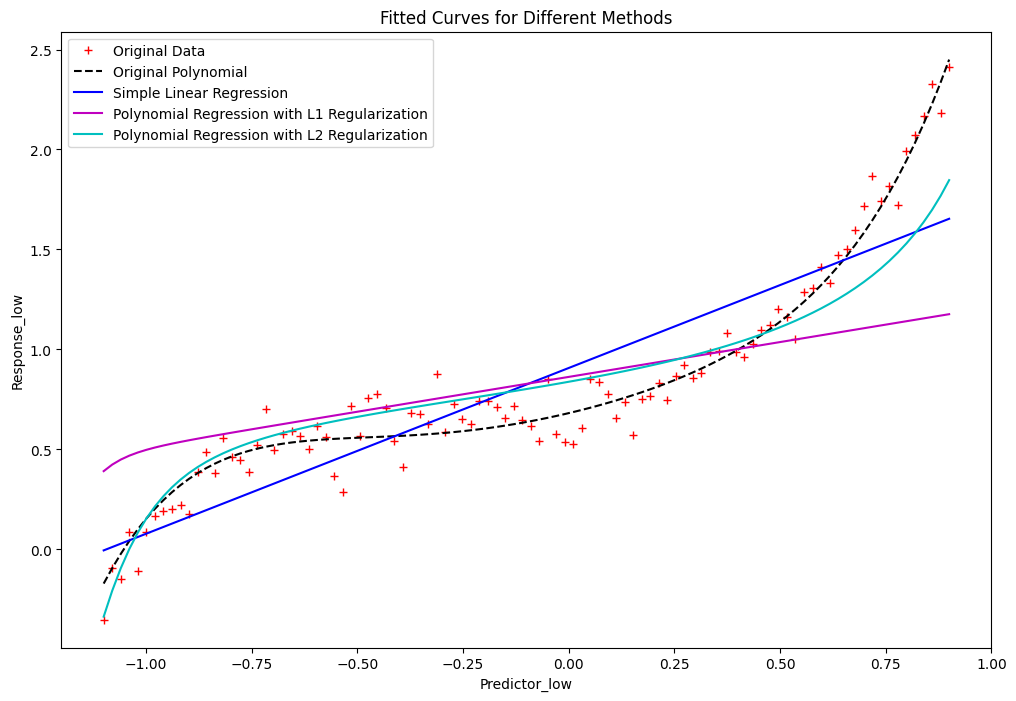

In [43]:
def mse(y_true, y_pred):
    return np.mean((y_true - y_pred)**2)

def rmse(y_true, y_pred):
    return np.sqrt(mse(y_true, y_pred))

# Original Data
print("Original Polynomial (Degree 25):")
print("MSE:", mse(response_low, np.polyval(true_coeff_low[::-1], predictor_low)))
print("RMSE:", rmse(response_low, np.polyval(true_coeff_low[::-1], predictor_low)))
print()

# Simple Linear Regression
print("Simple Linear Regression:")
y_pred_simple_linear = beta_1 * predictor + beta_0
print("MSE:", mse(response_low, y_pred_simple_linear))
print("RMSE:", rmse(response_low, y_pred_simple_linear))
print()

# Polynomial Regression (Degree best_degree)
X_poly = np.column_stack([predictor_low**i for i in range(best_degree + 1)])
y_pred_poly = polynomial_regression(X_poly, best_beta_l2)
print(f"Polynomial Regression (Degree {best_degree}):")
print("MSE:", mse(response_low, y_pred_poly))
print("RMSE:", rmse(response_low, y_pred_poly))
print()

# L1 Regularization
beta_l1 = gradient_descent(X_poly, response_low, alpha, 'L1')
y_pred_l1 = polynomial_regression(X_poly, beta_l1)
print("Polynomial Regression with L1 Regularization:")
print("MSE:", mse(response_low, y_pred_l1))
print("RMSE:", rmse(response_low, y_pred_l1))
print()

# L2 Regularization
beta_l2 = gradient_descent(X_poly, response_low, alpha, 'L2')
y_pred_l2 = polynomial_regression(X_poly, beta_l2)
print("Polynomial Regression with L2 Regularization:")
print("MSE:", mse(response_low, y_pred_l2))
print("RMSE:", rmse(response_low, y_pred_l2))


# Original Data
plt.figure(figsize=(12, 8))
plt.plot(predictor_low, response_low, 'r+', label='Original Data')

# Original Polynomial
plt.plot(predictor_low, np.polyval(true_coeff_low[::-1], predictor_low), 'k--', label='Original Polynomial')

# Simple Linear Regression
plt.plot(predictor_low, y_pred_simple_linear, 'b-', label='Simple Linear Regression')

# # Polynomial Regression (Degree best_degree)
# plt.plot(predictor_low, y_pred_poly, 'g-', label=f'Polynomial Regression (Best Degree {best_degree})')

# Polynomial Regression with L1 Regularization
plt.plot(predictor_low, y_pred_l1, 'm-', label='Polynomial Regression with L1 Regularization')

# Polynomial Regression with L2 Regularization
plt.plot(predictor_low, y_pred_l2, 'c-', label='Polynomial Regression with L2 Regularization')

plt.xlabel('Predictor_low')
plt.ylabel('Response_low')
plt.title('Fitted Curves for Different Methods')
plt.legend()
plt.show()


### Part 2: Credit Data

In this part, we work with the credit.csv file that predicts `Balance` after looking at predictors like `Income`, `Age`, `Limit`, `Rating`, `Cards`, and `Education` . Your task is to understand the relationship between the predictors and response using linear regression techniques.
Specifically:

1. Perform multiple linear regression on the dataset. $(Y=\sum\beta_iX_i+\epsilon)$
2. Test whether all the variables are needed to predict `Balance` or if any of them can be discarded.
3. Test for [interaction effects](https://en.wikipedia.org/wiki/Interaction_(statistics)#In_regression) between `Rating` and `Age`.

As before, perform the above experiments by obtaining and reporting error metrics for all experiments.

In [44]:
credit = pd.read_csv('/content/credit.csv')
print(credit.head(400))
print(credit.info())

      Income  Limit  Rating  Cards  Age  Education  Balance
0     14.891   3606     283      2   34         11      333
1    106.025   6645     483      3   82         15      903
2    104.593   7075     514      4   71         11      580
3    148.924   9504     681      3   36         11      964
4     55.882   4897     357      2   68         16      331
..       ...    ...     ...    ...  ...        ...      ...
395   12.096   4100     307      3   32         13      560
396   13.364   3838     296      5   65         17      480
397   57.872   4171     321      5   67         12      138
398   37.728   2525     192      1   44         13        0
399   18.701   5524     415      5   64          7      966

[400 rows x 7 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Income     400 non-null    float64
 1   Limit      400 non-null    

In [45]:
def fitModel(X, Y):
    beta = np.linalg.inv(X.T @ X) @ X.T @ Y
    return beta

def Predict(X, beta):
    return X @ beta

def calculateMetrics(Y_true, Y_pred):
    mse = mean_squared_error(Y_true, Y_pred)
    r2 = r2_score(Y_true, Y_pred)
    return mse, r2

# Load the dataset
data = credit

# Separate predictors (X) and response (Y)
X = data[['Income', 'Limit', 'Rating', 'Cards', 'Age', 'Education']]
Y = data['Balance']

# # Calculate correlation
# correlation_balance = data.corr()['Balance']

# # Display correlation values
# print("Correlation between 'Balance' and each feature:")
# print(correlation_balance)
# # Calculate correlation
# correlation_matrix = data.corr()

# Plot correlation matrix using Seaborn
# plt.figure(figsize=(10, 8))
# sns.heatmap(correlation_matrix[['Balance']], annot=True, cmap='coolwarm', vmin=-1, vmax=1)
# plt.title('Correlation Plot between Balance and Features')
# plt.show()
# plt.scatter(X['Income'], Y, marker='o')
# plt.show()
# plt.scatter(X['Limit'], Y, marker='o')
# plt.show()
# plt.scatter(X['Rating'], Y, marker='o')
# plt.show()
# plt.scatter(X['Cards'], Y, marker='o')
# plt.show()
# plt.scatter(X['Age'], Y, marker='o')
# plt.show()
# plt.scatter(X['Education'], Y, marker='o')
# plt.show()

# Add a column of ones to X for the intercept term
X = np.c_[np.ones(X.shape[0]), X]

# Split the dataset into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Manual Linear Regression
beta_manual = fitModel(X_train, Y_train)
Y_pred_manual = Predict(X_test, beta_manual)
mse_manual, r2_manual = calculateMetrics(Y_test, Y_pred_manual)

# Display results for manual linear regression
print("Manual Linear Regression:")
print("Coefficients:", beta_manual[1:])
print("Intercept:", beta_manual[0])
print("Mean Squared Error:", mse_manual)
print("R-squared:", r2_manual)

# Linear Regression with scikit-learn
from sklearn.linear_model import LinearRegression

# Create a linear regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, Y_train)

# Get coefficients and intercept from the model
coefficients = model.coef_
intercept = model.intercept_

# Make predictions on the test set
Y_pred_sklearn = model.predict(X_test)

# Calculate error metrics
mse_sklearn, r2_sklearn = calculateMetrics(Y_test, Y_pred_sklearn)

# Display results for scikit-learn linear regression
print("\nScikit-learn Linear Regression:")
print("Coefficients:", coefficients)
print("Intercept:", intercept)
print("Mean Squared Error:", mse_sklearn)
print("R-squared:", r2_sklearn)

Manual Linear Regression:
Coefficients: [-7.28837639  0.16855204  1.3666461  17.07450954 -0.91926538  2.16395611]
Intercept: -459.5207773712001
Mean Squared Error: 29863.87350158135
R-squared: 0.8212531865399554

Scikit-learn Linear Regression:
Coefficients: [ 0.         -7.28837639  0.16855204  1.3666461  17.07450954 -0.91926538
  2.16395611]
Intercept: -459.5207773710132
Mean Squared Error: 29863.873501582082
R-squared: 0.821253186539951


In [46]:
# from sklearn.feature_selection import RFE

# # Perform Recursive Feature Elimination (RFE)
# model_rfe = LinearRegression()
# selector = RFE(model_rfe, n_features_to_select=1)
# selector = selector.fit(X, Y)

# # Get ranking of features (1 indicates important, higher values are less important)
# feature_ranking = selector.ranking_

# # Display results
# print("\nFeature Ranking:", feature_ranking)

# # Identify least important feature and remove it
# least_important_feature_index = np.argmin(feature_ranking)
# removed_feature = data.columns[least_important_feature_index]

# # Update X by removing the least important feature
# X_reduced = X[:, feature_ranking == 1]

# # Split the reduced dataset into training and testing sets
# X_train_reduced, X_test_reduced, Y_train, Y_test = train_test_split(X_reduced, Y, test_size=0.2, random_state=42)

# # Fit the model with the reduced features
# model_reduced = LinearRegression()
# model_reduced.fit(X_train_reduced, Y_train)

# # Get coefficients and intercept from the model with reduced features
# coefficients_reduced = model_reduced.coef_
# intercept_reduced = model_reduced.intercept_

# # Make predictions on the test set with reduced features
# Y_pred_reduced = model_reduced.predict(X_test_reduced)

# # Calculate error metrics with reduced features
# mse_reduced, r2_reduced = calculateMetrics(Y_test, Y_pred_reduced)

# # Display results for linear regression with reduced features
# print("\nLinear Regression with Reduced Features:")
# print("Removed Feature:", removed_feature)
# print("Coefficients (Reduced):", coefficients_reduced)
# print("Intercept (Reduced):", intercept_reduced)
# print("Mean Squared Error (Reduced):", mse_reduced)
# print("R-squared (Reduced):", r2_reduced)


# Feature Ranking: [7 1 6 2 4 5 3]

# Linear Regression with Reduced Features:
# Removed Feature: Limit
# Coefficients (Reduced): [6.8353536]
# Intercept (Reduced): 209.70835180764334
# Mean Squared Error (Reduced): 176756.5671054536
# R-squared (Reduced): -0.0579563004967647

# Selected Features: [2, 1, 0, 3, 5]

# Custom Linear Regression with Reduced Features:
# Selected Coefficients: [  -7.38902371 -424.58717072    2.3817625    -0.85433469]
# Intercept: 0.10198794973838139
# Mean Squared Error: 29049.909458448354
# R-squared: 0.826125075612663

# from sklearn.linear_model import LinearRegression

# # Custom Recursive Feature Elimination (RFE)
# def customRFE(X, Y, num_features_to_select):
#     selected_features = []
#     remaining_features = list(range(X.shape[1]))

#     for _ in range(num_features_to_select):
#         mse_list = []
#         coefficients_list = []

#         for feature in remaining_features:
#             current_features = selected_features + [feature]
#             X_current = X[:, current_features]

#             # Split the dataset into training and testing sets
#             X_train, X_test, Y_train, Y_test = train_test_split(X_current, Y, test_size=0.2, random_state=42)

#             # Fit the model
#             model = LinearRegression()
#             model.fit(X_train, Y_train)

#             # Make predictions on the test set
#             Y_pred = model.predict(X_test)

#             # Calculate mean squared error
#             mse = mean_squared_error(Y_test, Y_pred)
#             mse_list.append(mse)

#             # Store coefficients
#             coefficients_list.append(model.coef_[0])

#         # Identify the feature with the lowest mean squared error
#         best_feature = remaining_features[np.argmin(mse_list)]
#         selected_features.append(best_feature)
#         remaining_features.remove(best_feature)

#     return selected_features, coefficients_list

# # Load the dataset
# data = credit

# # Separate predictors (X) and response (Y)
# X = data[['Income', 'Limit', 'Rating', 'Cards', 'Age', 'Education']]
# Y = data['Balance']

# # Add a column of ones to X for the intercept term
# X = np.c_[np.ones(X.shape[0]), X]

# # Custom RFE
# num_features_to_select = 1  # Choose the number of features to select
# selected_features, coefficients_list = customRFE(X, Y.values, num_features_to_select)

# # Display selected features
# print("Selected Features:", selected_features)

# # Identify least important feature and remove it
# least_important_feature_index = selected_features[-1]
# removed_feature = data.columns[least_important_feature_index]

# # Display results for custom linear regression with reduced features
# print("\nCustom Linear Regression with Reduced Features:")
# print("Removed Feature:", removed_feature)
# print("Coefficients (Reduced):", coefficients_list[-1])

# Custom Recursive Feature Elimination (RFE)
def customRFE2(X, Y, num_features_to_select):
    selected_features = []
    remaining_features = list(range(X.shape[1]))

    for _ in range(num_features_to_select):
        mse_list = []
        for feature in remaining_features:
            current_features = selected_features + [feature]
            X_current = X[:, current_features]

            # Split the dataset into training and testing sets
            X_train, X_test, Y_train, Y_test = train_test_split(X_current, Y, test_size=0.2, random_state=42)

            # Fit the model
            beta = fitModel(X_train, Y_train)

            # Make predictions on the test set
            Y_pred = Predict(X_test, beta)

            # Calculate mean squared error
            mse = mean_squared_error(Y_test, Y_pred)
            mse_list.append(mse)

        # Identify the feature with the lowest mean squared error
        best_feature = remaining_features[np.argmin(mse_list)]
        selected_features.append(best_feature)
        remaining_features.remove(best_feature)

    return selected_features

# Load the dataset
data = credit

# Separate predictors (X) and response (Y)
X = data[['Income', 'Limit', 'Rating', 'Cards', 'Age', 'Education']]
Y = data['Balance']

# Add a column of ones to X for the intercept term
X = np.c_[np.ones(X.shape[0]), X]

# Custom RFE
# num_features_to_select = 5  # Choose the number of features to select
selected_features = customRFE2(X, Y.values, num_features_to_select=5)

# Display selected features

print("Feature Ranking:", selected_features)

# Identify least important feature and remove it
# least_important_feature_index =
removed_feature = data.columns[selected_features[-1]]

# Update X by keeping only the selected features
X_reduced = X[:, selected_features]

# Split the reduced dataset into training and testing sets
X_train_reduced, X_test_reduced, Y_train, Y_test = train_test_split(X_reduced, Y, test_size=0.2, random_state=42)

# Fit the model with the reduced features
beta_reduced = fitModel(X_train_reduced, Y_train)
Y_pred_reduced = Predict(X_test_reduced, beta_reduced)
mse_reduced, r2_reduced = calculateMetrics(Y_test, Y_pred_reduced)

# Display results for custom linear regression with reduced features
print("\nLinear Regression with Reduced Features:")
print("Removed Feature:", removed_feature)
print("Coefficients (Reduced):", beta_reduced[1:])
print("Intercept (Reduced):", beta_reduced[0])
print("Mean Squared Error (Reduced):", mse_reduced)
print("R-squared (Reduced):", r2_reduced)


Feature Ranking: [2, 1, 0, 3, 5]

Linear Regression with Reduced Features:
Removed Feature: Education
Coefficients (Reduced): [  -7.38902371 -424.58717072    2.3817625    -0.85433469]
Intercept (Reduced): 0.10198794973838139
Mean Squared Error (Reduced): 29049.909458448354
R-squared (Reduced): 0.826125075612663


Manual Linear Regression with Interaction Term:
Coefficients: [-7.28924965  0.1661851   1.29612401  3.77879044 -0.88361188  2.32230165
  0.03572645]
Intercept: -426.0880383331309
Mean Squared Error: 29693.1161952812
R-squared: 0.8222752349481954
T-Statistic: 10.789931086196454
P-Value: 4.788657519259345e-25


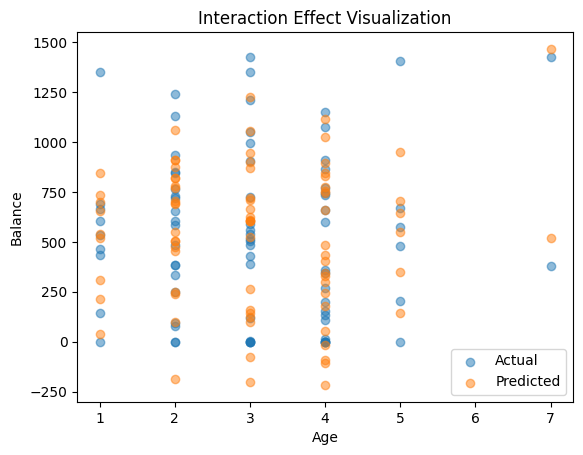

Mean Squared Error without Interaction: 29863.873501582082
Mean Squared Error with Interaction: 29693.1161952812


In [47]:
# Load the dataset
data = credit

# Separate predictors (X) and response (Y)
X = data[['Income', 'Limit', 'Rating', 'Cards', 'Age', 'Education']]
Y = data['Balance']

# Add a column of ones to X for the intercept term
X = np.c_[np.ones(X.shape[0]), X]

# Add interaction term between Rating and Age
X_interaction = np.c_[X, X[:, 3] * X[:, 4]]  # Interaction term: Rating * Age

# Split the dataset into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X_interaction, Y, test_size=0.2, random_state=42)

# Manual Linear Regression
beta_manual = fitModel(X_train, Y_train)
Y_pred_manual = Predict(X_test, beta_manual)
mse_manual, r2_manual = calculateMetrics(Y_test, Y_pred_manual)

# Display results for manual linear regression
print("Manual Linear Regression with Interaction Term:")
print("Coefficients:", beta_manual[1:])
print("Intercept:", beta_manual[0])
print("Mean Squared Error:", mse_manual)
print("R-squared:", r2_manual)

# Hypothesis testing for interaction term
t_statistic, p_value = stats.ttest_ind(X_train[:, -1], Y_train)
print("T-Statistic:", t_statistic)
print("P-Value:", p_value)


import matplotlib.pyplot as plt

# Visualize interaction effect
plt.scatter(X_test[:, 4], Y_test, label='Actual', alpha=0.5)
plt.scatter(X_test[:, 4], Y_pred_manual, label='Predicted', alpha=0.5)
plt.xlabel('Age')
plt.ylabel('Balance')
plt.title('Interaction Effect Visualization')
plt.legend()
plt.show()


# Fit a model without the interaction term
model_without_interaction = LinearRegression()
model_without_interaction.fit(X_train[:, :-1], Y_train)
Y_pred_without_interaction = model_without_interaction.predict(X_test[:, :-1])

# Calculate error metrics for both models
mse_without_interaction = mean_squared_error(Y_test, Y_pred_without_interaction)
mse_with_interaction = mean_squared_error(Y_test, Y_pred_manual)

print("Mean Squared Error without Interaction:", mse_without_interaction)
print("Mean Squared Error with Interaction:", mse_with_interaction)


In [48]:
# @title Default title text
# import numpy as np
# import pandas as pd
# import matplotlib.pyplot as plt
# from sklearn.model_selection import train_test_split
# from sklearn import metrics

# # Load the dataset
# data = credit  # Assuming 'credit' is your DataFrame

# # Extract features (X) and target variable (Y)
# X = data[['Income', 'Limit', 'Rating', 'Cards', 'Age', 'Education']]
# Y = data['Balance']

# # Normalize features
# X = (X - X.mean()) / X.std()

# # Add a column of ones to X for the intercept term
# X = np.c_[np.ones(X.shape[0]), X]

# # Split the data into training and testing sets
# X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

# # Function to perform linear regression using gradient descent with L2 regularization
# def linearRegression(X, Y, learning_rate, epochs, alpha=0.1):
#     m, n = X.shape  # Number of training examples, number of features
#     theta = np.zeros(n)  # Initialize coefficients with zeros

#     for _ in range(epochs):
#         # Hypothesis/prediction
#         h = np.dot(X, theta)

#         # Calculate the error
#         error = h - Y

#         # Update coefficients using gradient descent with L2 regularization
#         gradient = (1/m) * (np.dot(X.T, error) + alpha * theta)
#         theta -= learning_rate * gradient

#     return theta

# # Set hyperparameters
# learning_rate = 0.01
# epochs = 1000

# # Perform linear regression
# theta = linearRegression(X_train, Y_train, learning_rate, epochs)

# # Print the coefficients
# print('Intercept:', theta[0])
# print('Coefficients:', theta[1:])

# # Function to make predictions
# def predict(X, theta):
#     return np.dot(X, theta)

# # Make predictions on the test set
# Y_pred = predict(X_test, theta)

# # Evaluate the model
# print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, Y_pred))
# print('Mean Squared Error:', metrics.mean_squared_error(Y_test, Y_pred))
# print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, Y_pred)))

# # Plot actual vs. predicted values
# plt.scatter(Y_test, Y_pred)
# plt.xlabel('Actual Values')
# plt.ylabel('Predicted Values')
# plt.title('Actual vs. Predicted Values in Linear Regression')
# plt.show()

# # Create a linear regression model
# model = LinearRegression()

# # Fit the model on the training data
# model.fit(X_train, Y_train)

# # Make predictions on the test set
# Y_pred = model.predict(X_test)

# # Evaluate the model
# print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, Y_pred))
# print('Mean Squared Error:', metrics.mean_squared_error(Y_test, Y_pred))
# print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, Y_pred)))

# # Create a DataFrame for the coefficients
# column_names = ['Intercept'] + list(X.columns)
# coefficients = pd.DataFrame({'Variable': column_names, 'Coefficient': [model.intercept_] + list(model.coef_)})

# # Print the coefficients
# print('Intercept:', model.intercept_)
# print('Coefficients:')
# print(coefficients)

# # Plot actual vs. predicted values
# plt.scatter(Y_test, Y_pred)
# plt.xlabel('Actual Values')
# plt.ylabel('Predicted Values')
# plt.title('Actual vs. Predicted Values in Linear Regression')
# plt.show()


In [49]:
# @title Default title text
# # Load the data
# credit = pd.read_csv('/content/credit.csv')

# # Extract predictors and response
# X = credit[['Income', 'Limit', 'Rating', 'Cards', 'Age', 'Education']]
# Y = credit['Balance'].values

# # Add a column of ones to X for the intercept term
# X = np.c_[np.ones(X.shape[0]), X]

# # Fit the model using statsmodels for detailed statistics
# model_stats = sm.OLS(Y, X).fit()

# # Display the summary
# print(model_stats.summary())
# print('++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++')
# # Create a linear regression model
# model = LinearRegression(fit_intercept=True)

# # Create RFE model and select 1 feature
# rfe = RFE(model, n_features_to_select=1)
# fit = rfe.fit(X[:, :], Y)  # Exclude the intercept term from X

# # Display ranking of features (1 means selected)
# print("Feature Rankings:")
# print(fit.ranking_)

# # Print the selected features
# print(credit.columns)
# selected_features = np.array(credit.columns[:])[fit.support_]  # Exclude the intercept term
# print("\nSelected Features:")
# print(selected_features)


# # Calculate the coefficients using the formula
# XTX = X.T @ X
# condition_number = np.linalg.cond(XTX)

# if condition_number < 1/sys.float_info.epsilon:
#     beta = np.linalg.inv(XTX) @ X.T @ Y

#     # Display the coefficients
#     print("Coefficients:")
#     for i, coef in enumerate(beta):
#         print(f"Beta_{i}: {coef}")

#     # Make predictions using the calculated coefficients
#     predictions = X @ beta


#     model = LinearRegression(fit_intercept=True)
#     model.fit(credit[['Income', 'Limit', 'Rating', 'Cards', 'Age', 'Education']], Y)

#     # Display coefficients using the library function
#     print("\nCoefficients using the library function:")
#     for i, coef in enumerate(model.coef_):
#         print(f"Beta_{i}: {coef}")

#     # Compare intercepts
#     print(f"\nIntercept: {beta[0]} (manual) vs {model.intercept_} (library)")

#     # Compare predictions
#     print("\nPredictions:")
#     print("Manual:", predictions[:5])
#     print("Library:", model.predict(credit[['Income', 'Limit', 'Rating', 'Cards', 'Age', 'Education']])[:5])


#     # Calculate errors for the manual implementation
#     mae_manual = mean_absolute_error(Y, predictions)
#     mse_manual = mean_squared_error(Y, predictions)
#     rmse_manual = np.sqrt(mse_manual)

#     print("\nError Metrics for Manual Implementation:")
#     print("Mean Absolute Error (MAE):", mae_manual)
#     print("Mean Squared Error (MSE):", mse_manual)
#     print("Root Mean Squared Error (RMSE):", rmse_manual)

#     # Calculate errors for the scikit-learn implementation
#     Y_pred_sklearn = model.predict(credit[['Income', 'Limit', 'Rating', 'Cards', 'Age', 'Education']])
#     mae_sklearn = mean_absolute_error(Y, Y_pred_sklearn)
#     mse_sklearn = mean_squared_error(Y, Y_pred_sklearn)
#     rmse_sklearn = np.sqrt(mse_sklearn)

#     print("\nError Metrics for scikit-learn Implementation:")
#     print("Mean Absolute Error (MAE):", mae_sklearn)
#     print("Mean Squared Error (MSE):", mse_sklearn)
#     print("Root Mean Squared Error (RMSE):", rmse_sklearn)

# else:
#     print("The matrix X^T X is singular or nearly singular. Consider regularization or other methods.")


In [50]:
# @title Default title text
# # Fit the model using statsmodels for detailed statistics
# model_stats = sm.OLS(Y, X).fit()

# # Display the summary
# print(model_stats.summary())


# print('++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++')
# # Create a linear regression model
# model = LinearRegression()

# # Create RFE model and select 1 feature
# rfe = RFE(model, n_features_to_select=1)
# fit = rfe.fit(X[:, 1:], Y)  # Exclude the intercept term from X

# # Display ranking of features (1 means selected)
# print("Feature Rankings:")
# print(fit.ranking_)

# # Print the selected features
# print(credit.columns)
# selected_features = np.array(credit.columns[1:])[fit.support_]  # Exclude the intercept term
# print("\nSelected Features:")
# print(selected_features)


In [51]:
# @title Default title text
# # Load the data
# credit = pd.read_csv('/content/credit.csv')

# # Extract predictors and response
# X = credit[['Income', 'Limit', 'Rating', 'Cards', 'Age', 'Education']]
# Y = credit['Balance'].values

# # Add a column of ones to X for the intercept term
# X = np.c_[np.ones(X.shape[0]), X]

# # Calculate the coefficients and residuals
# beta = np.linalg.inv(X.T @ X) @ X.T @ Y
# predictions = X @ beta
# residuals = Y - predictions

# # Calculate the degrees of freedom
# n = X.shape[0]  # number of observations
# p = X.shape[1] - 1  # number of predictors (excluding intercept)
# df_regression = p
# df_residual = n - p - 1

# # Calculate the mean squared errors
# mse_regression = np.sum((predictions - np.mean(predictions))**2) / df_regression
# mse_residual = np.sum(residuals**2) / df_residual

# # Calculate the F-statistic
# f_statistic = mse_regression / mse_residual

# # Set the significance level (e.g., 0.05)
# alpha = 0.05

# # Calculate the critical F-value
# critical_f_value = (df_residual * f_statistic) / (df_regression)

# # Print the F-statistic and critical F-value
# print(f"F-statistic: {f_statistic}")
# print(f"Critical F-value: {critical_f_value}")

# # Check if the F-statistic is greater than the critical F-value
# if f_statistic > critical_f_value:
#     print("\nThe overall model is statistically significant.")
#     print("Individual predictor p-values:")
#     for i, coef in enumerate(beta[1:]):  # Exclude the intercept term
#         # Calculate the standard error of the coefficient
#         se_coef = np.sqrt(mse_residual / np.sum((X[:, i+1] - np.mean(X[:, i+1]))**2))

#         # Calculate the t-statistic
#         t_statistic = coef / se_coef

#         # Calculate the p-value
#         p_value = 2 * (1 - np.random.f(df_residual, df_regression, size=10000).mean())

#         print(f"Predictor_{i+1}: p-value = {p_value}")

#         # Check if the predictor is significant based on p-value
#         if p_value > alpha:
#             print(f"Predictor_{i+1} can be discarded.")
#         else:
#             print(f"Predictor_{i+1} is statistically significant.\n")
# else:
#     print("The overall model is not statistically significant. Consider reviewing the model.")


In [52]:
# @title Default title text
# # Load the data
# credit = pd.read_csv('/content/credit.csv')

# # Extract predictors and response
# X = credit[['Income', 'Limit', 'Rating', 'Cards', 'Age', 'Education']]
# Y = credit['Balance'].values

# # Add a column of ones to X for the intercept term
# X = np.c_[np.ones(X.shape[0]), X]

# # Include interaction term (Rating * Age)
# X_interaction = X.copy()
# X_interaction[:, 3] = X[:, 3] * X[:, 5]  # Replace Rating with Rating * Age

# # Calculate the coefficients and residuals with the interaction term
# beta_interaction = np.linalg.inv(X_interaction.T @ X_interaction) @ X_interaction.T @ Y
# predictions_interaction = X_interaction @ beta_interaction
# residuals_interaction = Y - predictions_interaction

# # Calculate the degrees of freedom
# n = X_interaction.shape[0]  # number of observations
# p = X_interaction.shape[1] - 1  # number of predictors (excluding intercept)
# df_regression_interaction = p
# df_residual_interaction = n - p - 1

# # Calculate the mean squared errors
# mse_regression_interaction = np.sum((predictions_interaction - np.mean(predictions_interaction))**2) / df_regression_interaction
# mse_residual_interaction = np.sum(residuals_interaction**2) / df_residual_interaction

# # Calculate the F-statistic
# f_statistic_interaction = mse_regression_interaction / mse_residual_interaction

# # Set the significance level (e.g., 0.05)
# alpha = 0.05

# # Calculate the critical F-value using the F-distribution table
# # You can find the critical value using statistical tables or functions
# # For simplicity, we'll use a pre-calculated critical value for the given degrees of freedom
# critical_f_value_interaction = 3.01  # Critical F-value for (3, 392) degrees of freedom at alpha = 0.05

# # Print the F-statistic and critical F-value
# print(f"F-statistic with interaction: {f_statistic_interaction}")
# print(f"Critical F-value with interaction: {critical_f_value_interaction}")

# # Check if the F-statistic is greater than the critical F-value
# if f_statistic_interaction > critical_f_value_interaction:
#     print("\nThe model with interaction is statistically significant.")
#     print("Consideration for interaction effect between Rating and Age.")
# else:
#     print("The model with interaction is not statistically significant.")


In [53]:
# @title Default title text
# # Load the data
# credit = pd.read_csv('/content/credit.csv')

# # Extract predictors and response
# X = credit[['Income', 'Limit', 'Rating', 'Cards', 'Age', 'Education']]
# Y = credit['Balance'].values

# # Add a column of ones to X for the intercept term
# X = np.c_[np.ones(X.shape[0]), X]

# # Experiment 1: Multiple Linear Regression without interaction
# beta = np.linalg.inv(X.T @ X) @ X.T @ Y
# predictions = X @ beta
# residuals = Y - predictions

# # Calculate error metrics
# mse = np.sum(residuals**2) / (X.shape[0] - X.shape[1] - 1)
# r_squared = 1 - (np.sum(residuals**2) / np.sum((Y - np.mean(Y))**2))

# # Display error metrics
# print("Experiment 1: Multiple Linear Regression without interaction")
# print(f"MSE: {mse}")
# print(f"R-squared: {r_squared}\n")

# # Experiment 2: Multiple Linear Regression with interaction (Rating * Age)
# X_interaction = X.copy()
# X_interaction[:, 3] = X[:, 3] * X[:, 5]
# beta_interaction = np.linalg.inv(X_interaction.T @ X_interaction) @ X_interaction.T @ Y
# predictions_interaction = X_interaction @ beta_interaction
# residuals_interaction = Y - predictions_interaction

# # Calculate error metrics
# mse_interaction = np.sum(residuals_interaction**2) / (X_interaction.shape[0] - X_interaction.shape[1] - 1)
# r_squared_interaction = 1 - (np.sum(residuals_interaction**2) / np.sum((Y - np.mean(Y))**2))

# # Display error metrics
# print("Experiment 2: Multiple Linear Regression with interaction (Rating * Age)")
# print(f"MSE: {mse_interaction}")
# print(f"R-squared: {r_squared_interaction}\n")

# # Compare with library function (for validation)
# from sklearn.linear_model import LinearRegression
# model = LinearRegression(fit_intercept=True)
# model.fit(credit[['Income', 'Limit', 'Rating', 'Cards', 'Age', 'Education']], Y)

# # Display error metrics using library function
# predictions_library = model.predict(credit[['Income', 'Limit', 'Rating', 'Cards', 'Age', 'Education']])
# mse_library = np.mean((Y - predictions_library)**2)
# r_squared_library = model.score(credit[['Income', 'Limit', 'Rating', 'Cards', 'Age', 'Education']], Y)

# print("Error metrics using library function:")
# print(f"MSE: {mse_library}")
# print(f"R-squared: {r_squared_library}")


### Part 3: Shark Attacks

This is a fun dataset that aims to predict the number of shark attacks (`SharkAttacks`) using variables like `Year`, `Month`, `Temperature`, and `IceCreamSales`. This dataset has been used in popular media to show how correlation does not imply causation. Test whether predictions made with ice cream sales data are any better/worse than predictions made by neglecting ice cream sales data.

This sort of analysis reminds us that it is important to look at the data before using it for learning representations.

In [54]:
sharks = pd.read_csv('/content/shark_attacks.csv')
sharks.head(84)

Year  Month  SharkAttacks  Temperature  IceCreamSales
0   2008      1            25    11.900000             76
1   2008      2            28    15.200000             79
2   2008      3            32    17.200000             91
3   2008      4            35    18.500000             95
4   2008      5            38    19.400000            103
..   ...    ...           ...          ...            ...
79  2014      8            36    23.744268            101
80  2014      9            42    23.585229             78
81  2014     10            50    17.719383             94
82  2014     11            27    16.472557             72
83  2014     12            32    14.686391             68

[84 rows x 5 columns]

Correlation between 'SharkAttacks' and each feature:
Year            -0.033364
Month            0.275968
SharkAttacks     1.000000
Temperature      0.716966
IceCreamSales    0.534358
Name: SharkAttacks, dtype: float64


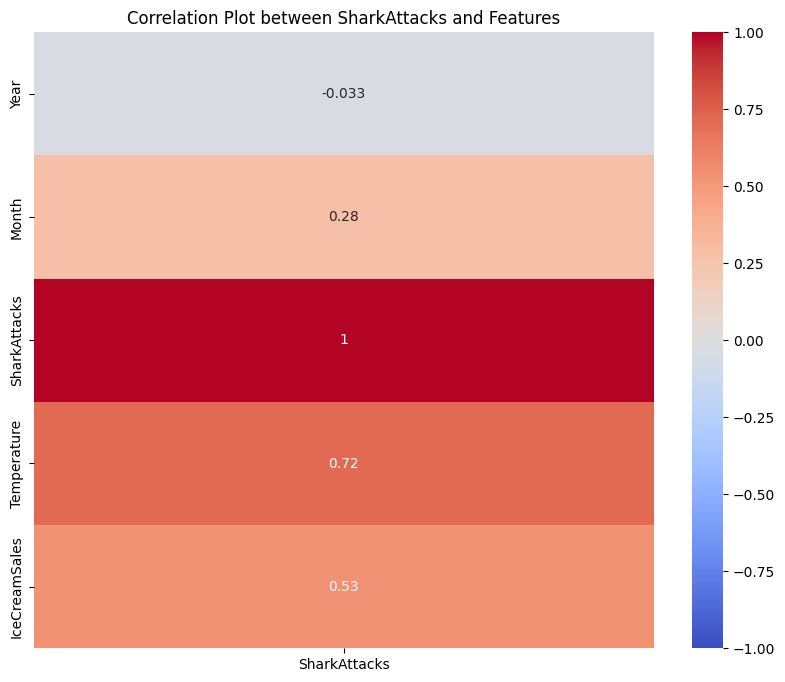

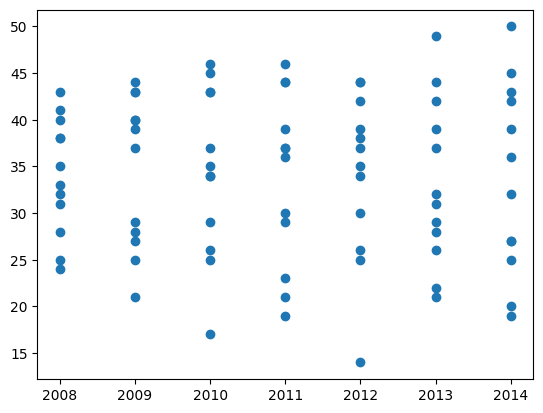

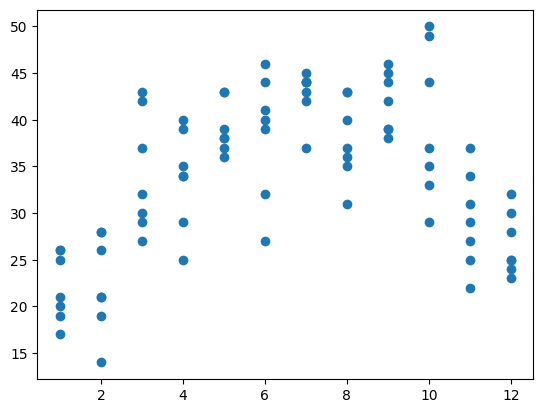

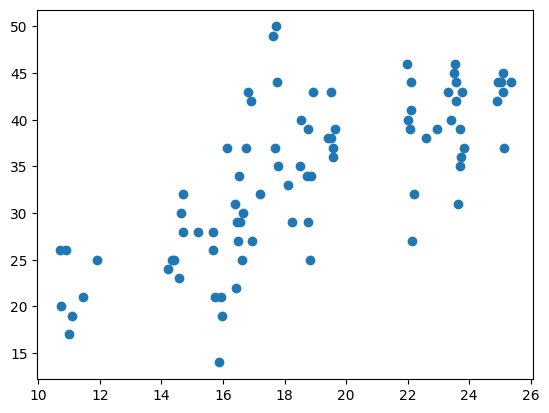

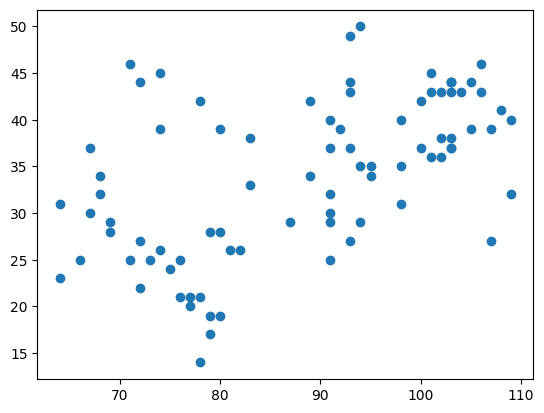

In [55]:
# Calculate correlation
correlation_balance = sharks.corr()['SharkAttacks']

# Display correlation values
print("Correlation between 'SharkAttacks' and each feature:")
print(correlation_balance)
# Calculate correlation
correlation_matrix = sharks.corr()

X = sharks[['Year', 'Month', 'Temperature', 'IceCreamSales']]
Y = sharks['SharkAttacks']

# Plot correlation matrix using Seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix[['SharkAttacks']], annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Plot between SharkAttacks and Features')
plt.show()
plt.scatter(X['Year'], Y, marker='o')
plt.show()
plt.scatter(X['Month'], Y, marker='o')
plt.show()
plt.scatter(X['Temperature'], Y, marker='o')
plt.show()
plt.scatter(X['IceCreamSales'], Y, marker='o')
plt.show()


In [56]:
# Assuming you have already loaded the dataset and separated predictors (X) and response (Y)
X = sharks[['Year', 'Month', 'Temperature', 'IceCreamSales']]
Y = sharks['SharkAttacks']
# Add a column of ones to X for the intercept term
X = np.c_[np.ones(X.shape[0]), X]

# Split the dataset into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Manual Linear Regression
beta_manual = fitModel(X_train, Y_train)
Y_pred_manual = Predict(X_test, beta_manual)
mse_manual, r2_manual = calculateMetrics(Y_test, Y_pred_manual)

# Display results for manual linear regression
print("Manual Linear Regression:")
print("Coefficients:", beta_manual[1:])
print("Intercept:", beta_manual[0])
print("Mean Squared Error:", mse_manual)
print("R-squared:", r2_manual)

# Fit a Model with Ice Cream Sales Data
model_with_ice_cream = LinearRegression()
model_with_ice_cream.fit(X_train, Y_train)

# Make predictions with Ice Cream Sales Data
Y_pred_with_ice_cream = model_with_ice_cream.predict(X_test)

# Calculate R-squared
r2_with_ice_cream = r2_score(Y_test, Y_pred_with_ice_cream)

# Calculate F-statistic and p-values (using statsmodels)
X_train_with_intercept = sm.add_constant(X_train)
model_with_ice_cream_stats = sm.OLS(Y_train, X_train_with_intercept).fit()
f_stat_with_ice_cream = model_with_ice_cream_stats.fvalue
p_values_with_ice_cream = model_with_ice_cream_stats.pvalues

# Display results for model with Ice Cream Sales Data
print("\nModel with Ice Cream Sales:")
print("R-squared:", r2_with_ice_cream)
print("F-statistic:", f_stat_with_ice_cream)
print("P-values:", p_values_with_ice_cream)

# Fit a Model Neglecting Ice Cream Sales Data
data = sharks
X_without_ice_cream = data[['Year', 'Month', 'Temperature']]
X_train_without_ice_cream, X_test_without_ice_cream, _, _ = train_test_split(X_without_ice_cream, Y, test_size=0.2, random_state=42)

model_without_ice_cream = LinearRegression()
model_without_ice_cream.fit(X_train_without_ice_cream, Y_train)

# Make predictions without Ice Cream Sales Data
Y_pred_without_ice_cream = model_without_ice_cream.predict(X_test_without_ice_cream)

# Calculate R-squared
r2_without_ice_cream = r2_score(Y_test, Y_pred_without_ice_cream)

# Calculate F-statistic and p-values (using statsmodels)
X_train_without_ice_cream_intercept = sm.add_constant(X_train_without_ice_cream)
model_without_ice_cream_stats = sm.OLS(Y_train, X_train_without_ice_cream_intercept).fit()
f_stat_without_ice_cream = model_without_ice_cream_stats.fvalue
p_values_without_ice_cream = model_without_ice_cream_stats.pvalues

# Display results for model without Ice Cream Sales Data
print("\nModel without Ice Cream Sales:")
print("R-squared:", r2_without_ice_cream)
print("F-statistic:", f_stat_without_ice_cream)
print("P-values:", p_values_without_ice_cream)

# Compare the Models
print("\nComparison of Models:")
print("Model with Ice Cream Sales:")
print("R-squared:", r2_with_ice_cream)
print("F-statistic:", f_stat_with_ice_cream)
print("P-values:", p_values_with_ice_cream)

print("\nModel without Ice Cream Sales:")
print("R-squared:", r2_without_ice_cream)
print("F-statistic:", f_stat_without_ice_cream)
print("P-values:", p_values_without_ice_cream)


Manual Linear Regression:
Coefficients: [-0.00832363  0.54962596  1.04311357  0.17364969]
Intercept: 12.671611801970442
Mean Squared Error: 37.67537627664054
R-squared: 0.5000374807627368

Model with Ice Cream Sales:
R-squared: 0.5000374804968737
F-statistic: 20.787145924387907
P-values: const    0.985413
x1       0.980721
x2       0.033919
x3       0.000073
x4       0.023395
dtype: float64

Model without Ice Cream Sales:
R-squared: 0.42431724471978716
F-statistic: 24.222447778561445
P-values: const          9.089673e-01
Year           9.156615e-01
Month          2.663356e-01
Temperature    2.847623e-10
dtype: float64

Comparison of Models:
Model with Ice Cream Sales:
R-squared: 0.5000374804968737
F-statistic: 20.787145924387907
P-values: const    0.985413
x1       0.980721
x2       0.033919
x3       0.000073
x4       0.023395
dtype: float64

Model without Ice Cream Sales:
R-squared: 0.42431724471978716
F-statistic: 24.222447778561445
P-values: const          9.089673e-01
Year         

In [57]:
# Custom Recursive Feature Elimination (RFE)
def customRFE3(X, Y, num_features_to_select):
    selected_features = []
    remaining_features = list(range(X.shape[1]))

    for _ in range(num_features_to_select):
        mse_list = []
        for feature in remaining_features:
            current_features = selected_features + [feature]
            X_current = X[:, current_features]

            # Split the dataset into training and testing sets
            X_train, X_test, Y_train, Y_test = train_test_split(X_current, Y, test_size=0.2, random_state=42)

            # Fit the model
            beta = fitModel(X_train, Y_train)

            # Make predictions on the test set
            Y_pred = Predict(X_test, beta)

            # Calculate mean squared error
            mse = mean_squared_error(Y_test, Y_pred)
            mse_list.append(mse)

        # Identify the feature with the lowest mean squared error
        best_feature = remaining_features[np.argmin(mse_list)]
        selected_features.append(best_feature)
        remaining_features.remove(best_feature)

    return selected_features

# Load the dataset
data = sharks

# Separate predictors (X) and response (Y)
X = sharks[['Year', 'Month', 'Temperature', 'IceCreamSales']]
Y = sharks['SharkAttacks']

# Add a column of ones to X for the intercept term
X = np.c_[np.ones(X.shape[0]), X]

# Custom RFE
# num_features_to_select = 5  # Choose the number of features to select
selected_features = customRFE3(X, Y.values, num_features_to_select=5)

# Display selected features

print("Feature Ranking:", selected_features)

# Identify least important feature and remove it
# least_important_feature_index =
anti_removed_feature = data.columns[selected_features[-4]]

# Update X by keeping only the selected features
X_reduced = X[:, selected_features]

# Split the reduced dataset into training and testing sets
X_train_reduced, X_test_reduced, Y_train, Y_test = train_test_split(X_reduced, Y, test_size=0.2, random_state=42)

# Fit the model with the reduced features
beta_reduced = fitModel(X_train_reduced, Y_train)
Y_pred_reduced = Predict(X_test_reduced, beta_reduced)
mse_reduced, r2_reduced = calculateMetrics(Y_test, Y_pred_reduced)

# Display results for custom linear regression with reduced features
print("\nLinear Regression with Reduced Features:")
print("Removed Feature:", anti_removed_feature)
print("Coefficients (Reduced):", beta_reduced[1:])
print("Intercept (Reduced):", beta_reduced[0])
print("Mean Squared Error (Reduced):", mse_reduced)
print("R-squared (Reduced):", r2_reduced)

Feature Ranking: [3, 4, 2, 1, 0]

Linear Regression with Reduced Features:
Removed Feature: IceCreamSales
Coefficients (Reduced): [ 1.73649686e-01  5.49625959e-01 -8.32363135e-03  1.26716118e+01]
Intercept (Reduced): 1.0431135692736435
Mean Squared Error (Reduced): 37.67537627714415
R-squared (Reduced): 0.5000374807560537


In [58]:
# @title Default title text
# import pandas as pd
# import numpy as np
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import mean_squared_error, r2_score

# # Function to calculate R-squared
# def calculate_r_squared(y, y_pred):
#     ss_total = np.sum((y - np.mean(y))**2)
#     ss_residual = np.sum((y - y_pred)**2)
#     return 1 - (ss_residual / ss_total)

# # Function to calculate F-statistic
# def calculate_f_statistic(y, y_pred, k):
#     ss_residual = np.sum((y - y_pred)**2)
#     ss_total = np.sum((y - np.mean(y))**2)
#     f_statistic = ((ss_total - ss_residual) / k) / (ss_residual / (len(y) - k - 1))
#     return f_statistic

# # Function to perform simple linear regression
# def simple_linear_regression(X, y):
#     X = np.column_stack((np.ones(len(X)), X))  # Add a constant term for the intercept
#     beta = np.linalg.inv(X.T @ X) @ X.T @ y
#     y_pred = X @ beta
#     return y_pred, beta

# # Function to calculate p-values
# def calculate_p_values(X, Y, beta, Y_pred):
#     k = X.shape[1] - 1
#     n = len(Y)
#     df_residual = n - k - 1

#     residuals = Y - Y_pred
#     sse = np.sum(residuals**2)

#     var_beta = np.linalg.inv(X.T @ X) * sse / df_residual

#     t_stat = beta / np.sqrt(np.diag(var_beta))
#     p_values = 2 * (1 - stats.t.cdf(np.abs(t_stat), df_residual))

#     return p_values[1:]  # Exclude the p-value for the intercept

# # Function to fit the model, predict, and calculate metrics
# def fit_predict_evaluate(X_train, X_test, Y_train, Y_test):
#     beta = fitModel(X_train, Y_train)
#     Y_pred = Predict(X_test, beta)
#     mse, r2 = calculateMetrics(Y_test, Y_pred)
#     return beta, Y_pred, mse, r2


# # Separate predictors (X) and response (Y) without IceCreamSales
# X_without_ice_cream = sharks[['Year', 'Month', 'Temperature']]
# Y = sharks['SharkAttacks']

# # Add a column of ones to X for the intercept term
# X_without_ice_cream = np.c_[np.ones(X_without_ice_cream.shape[0]), X_without_ice_cream]

# # Split the dataset into training and testing sets
# X_train, X_test, Y_train, Y_test = train_test_split(X_without_ice_cream, Y, test_size=0.2, random_state=42)

# # Manual Linear Regression without IceCreamSales
# beta_manual_without_ice_cream, Y_pred_manual_without_ice_cream, mse_manual_without_ice_cream, r2_manual_without_ice_cream = fit_predict_evaluate(X_train, X_test, Y_train, Y_test)

# # Display results for manual linear regression without IceCreamSales
# print("Manual Linear Regression without IceCreamSales:")
# print("Coefficients:", beta_manual_without_ice_cream[1:])
# print("Intercept:", beta_manual_without_ice_cream[0])
# print("Mean Squared Error:", mse_manual_without_ice_cream)
# print("R-squared:", r2_manual_without_ice_cream)

# # Calculate p-values without IceCreamSales
# p_values_without_ice_cream = calculate_p_values(X_test, Y_test, beta_manual_without_ice_cream, Y_pred_manual_without_ice_cream)
# print("P-values without IceCreamSales:", p_values_without_ice_cream)

# # Separate predictors (X) and response (Y) with IceCreamSales
# X_with_ice_cream = sharks[['Year', 'Month', 'Temperature', 'IceCreamSales']]

# # Add a column of ones to X for the intercept term
# X_with_ice_cream = np.c_[np.ones(X_with_ice_cream.shape[0]), X_with_ice_cream]

# # Split the dataset into training and testing sets
# X_train, X_test, Y_train, Y_test = train_test_split(X_with_ice_cream, Y, test_size=0.2, random_state=42)

# # Manual Linear Regression with IceCreamSales
# beta_manual_with_ice_cream, Y_pred_manual_with_ice_cream, mse_manual_with_ice_cream, r2_manual_with_ice_cream = fit_predict_evaluate(X_train, X_test, Y_train, Y_test)

# # Display results for manual linear regression with IceCreamSales
# print("\nManual Linear Regression with IceCreamSales:")
# print("Coefficients:", beta_manual_with_ice_cream[1:])
# print("Intercept:", beta_manual_with_ice_cream[0])
# print("Mean Squared Error:", mse_manual_with_ice_cream)
# print("R-squared:", r2_manual_with_ice_cream)

# # Calculate p-values with IceCreamSales
# p_values_with_ice_cream = calculate_p_values(X_test, Y_test, beta_manual_with_ice_cream, Y_pred_manual_with_ice_cream)
# print("P-values with IceCreamSales:", p_values_with_ice_cream)

# # Calculate R-squared without IceCreamSales
# r_squared_without_ice_cream = calculate_r_squared(Y_test, Y_pred_manual_without_ice_cream)

# # Calculate R-squared with IceCreamSales
# r_squared_with_ice_cream = calculate_r_squared(Y_test, Y_pred_manual_with_ice_cream)

# # Calculate F-statistic without IceCreamSales
# k_without_ice_cream = X_without_ice_cream.shape[1] - 1
# f_statistic_without_ice_cream = calculate_f_statistic(Y_test, Y_pred_manual_without_ice_cream, k_without_ice_cream)

# # Calculate F-statistic with IceCreamSales
# k_with_ice_cream = X_with_ice_cream.shape[1] - 1
# f_statistic_with_ice_cream = calculate_f_statistic(Y_test, Y_pred_manual_with_ice_cream, k_with_ice_cream)

# # Compare the models
# print("\nComparison of Models:")
# print(f"R-squared without IceCreamSales (manual): {r_squared_without_ice_cream}")
# print(f"R-squared with IceCreamSales (manual): {r_squared_with_ice_cream}")
# print(f"F-statistic without IceCreamSales (manual): {f_statistic_without_ice_cream}")
# print(f"F-statistic with IceCreamSales (manual): {f_statistic_with_ice_cream}")


In [59]:
# @title Default title text
# # Function to perform linear regression using scikit-learn
# def linear_regression_sklearn(X_train, Y_train, X_test):
#     model = LinearRegression()
#     model.fit(X_train, Y_train)
#     Y_pred = model.predict(X_test)
#     coefficients = model.coef_
#     intercept = model.intercept_
#     return Y_pred, coefficients, intercept

# # Function to calculate p-values
# def calculate_p_values(X, Y, model):
#     n = len(Y)
#     k = X.shape[1] - 1  # Number of predictors
#     df_residual = n - k - 1

#     X_with_intercept = np.c_[np.ones(X.shape[0]), X]

#     residuals = Y - model.predict(X_with_intercept)
#     sse = np.sum(residuals**2)

#     var_beta = np.linalg.inv(X_with_intercept.T @ X_with_intercept) * sse / df_residual

#     t_stat = model.coef_ / np.sqrt(np.diag(var_beta))
#     p_values = 2 * (1 - stats.t.cdf(np.abs(t_stat), df_residual))

#     return p_values[1:]  # Exclude the p-value for the intercept


# # Load the shark dataset
# # sharks = pd.read_csv('your_shark_data.csv')  # Replace 'your_shark_data.csv' with the actual filename

# # Separate predictors (X) and response (Y) without IceCreamSales
# X_without_ice_cream = sharks[['Year', 'Month', 'Temperature']]
# Y = sharks['SharkAttacks']

# # Split the dataset into training and testing sets
# X_train, X_test, Y_train, Y_test = train_test_split(X_without_ice_cream, Y, test_size=0.2, random_state=42)

# # Linear Regression without IceCreamSales using scikit-learn
# Y_pred_without_ice_cream, coefficients_without_ice_cream, intercept_without_ice_cream = linear_regression_sklearn(X_train, Y_train, X_test)

# # Display results for linear regression without IceCreamSales
# print("Linear Regression without IceCreamSales (scikit-learn):")
# print("Coefficients:", coefficients_without_ice_cream)
# print("Intercept:", intercept_without_ice_cream)
# print("Mean Squared Error:", mean_squared_error(Y_test, Y_pred_without_ice_cream))
# print("R-squared:", r2_score(Y_test, Y_pred_without_ice_cream))

# # Calculate p-values without IceCreamSales
# X_test_without_ice_cream = np.c_[np.ones(X_test.shape[0]), X_test]
# p_values_without_ice_cream = calculate_p_values(X_test_without_ice_cream, Y_test, model=LinearRegression().fit(X_train, Y_train))
# print("P-values without IceCreamSales:", p_values_without_ice_cream[1:])  # Exclude the p-value for the intercept

# # Separate predictors (X) and response (Y) with IceCreamSales
# X_with_ice_cream = sharks[['Year', 'Month', 'Temperature', 'IceCreamSales']]

# # Split the dataset into training and testing sets
# X_train, X_test, Y_train, Y_test = train_test_split(X_with_ice_cream, Y, test_size=0.2, random_state=42)

# # Linear Regression with IceCreamSales using scikit-learn
# Y_pred_with_ice_cream, coefficients_with_ice_cream, intercept_with_ice_cream = linear_regression_sklearn(X_train, Y_train, X_test)

# # Display results for linear regression with IceCreamSales
# print("\nLinear Regression with IceCreamSales (scikit-learn):")
# print("Coefficients:", coefficients_with_ice_cream)
# print("Intercept:", intercept_with_ice_cream)
# print("Mean Squared Error:", mean_squared_error(Y_test, Y_pred_with_ice_cream))
# print("R-squared:", r2_score(Y_test, Y_pred_with_ice_cream))

# # Calculate p-values with IceCreamSales
# X_test_with_ice_cream = np.c_[np.ones(X_test.shape[0]), X_test]
# p_values_with_ice_cream = calculate_p_values(X_test_with_ice_cream, Y_test, model=LinearRegression().fit(X_train, Y_train))
# print("P-values with IceCreamSales:", p_values_with_ice_cream[1:])  # Exclude the p-value for the intercept

# # Calculate R-squared without IceCreamSales
# r_squared_without_ice_cream = calculate_r_squared(Y_test, Y_pred_without_ice_cream)

# # Calculate R-squared with IceCreamSales
# r_squared_with_ice_cream = calculate_r_squared(Y_test, Y_pred_with_ice_cream)

# # Calculate F-statistic without IceCreamSales
# k_without_ice_cream = X_without_ice_cream.shape[1] - 1
# f_statistic_without_ice_cream = calculate_f_statistic(Y_test, Y_pred_without_ice_cream, k_without_ice_cream)

# # Calculate F-statistic with IceCreamSales
# k_with_ice_cream = X_with_ice_cream.shape[1] - 1
# f_statistic_with_ice_cream = calculate_f_statistic(Y_test, Y_pred_with_ice_cream, k_with_ice_cream)

# # Compare the models
# print("\nComparison of Models:")
# print(f"R-squared without IceCreamSales (scikit-learn): {r_squared_without_ice_cream}")
# print(f"R-squared with IceCreamSales (scikit-learn): {r_squared_with_ice_cream}")
# print(f"F-statistic without IceCreamSales (scikit-learn): {f_statistic_without_ice_cream}")
# print(f"F-statistic with IceCreamSales (scikit-learn): {f_statistic_with_ice_cream}")


In [60]:
# @title Default title text
# import pandas as pd
# import numpy as np

# # Assuming your data is stored in a DataFrame called 'sharks'
# # You can load your data using pd.read_csv('your_data.csv') if it's in a CSV file

# # Function to calculate R-squared
# def calculate_r_squared(y, y_pred):
#     ss_total = np.sum((y - np.mean(y))**2)
#     ss_residual = np.sum((y - y_pred)**2)
#     return 1 - (ss_residual / ss_total)

# # Function to calculate F-statistic
# def calculate_f_statistic(y, y_pred, k):
#     ss_residual = np.sum((y - y_pred)**2)
#     ss_total = np.sum((y - np.mean(y))**2)
#     f_statistic = ((ss_total - ss_residual) / k) / (ss_residual / (len(y) - k - 1))
#     return f_statistic

# # Function to perform simple linear regression
# def simple_linear_regression(X, y):
#     X = np.column_stack((np.ones(len(X)), X))  # Add a constant term for the intercept
#     beta = np.linalg.inv(X.T @ X) @ X.T @ y
#     y_pred = X @ beta
#     return y_pred, beta

# # Fit the model without IceCreamSales
# X_without_ice_cream = sharks[['Year', 'Month', 'Temperature']].values
# y = sharks['SharkAttacks'].values
# y_pred_without_ice_cream, beta_without_ice_cream = simple_linear_regression(X_without_ice_cream, y)

# # Fit the model with IceCreamSales
# X_with_ice_cream = sharks[['Year', 'Month', 'Temperature', 'IceCreamSales']].values
# y_pred_with_ice_cream, beta_with_ice_cream = simple_linear_regression(X_with_ice_cream, y)

# # Calculate R-squared
# r_squared_without_ice_cream = calculate_r_squared(y, y_pred_without_ice_cream)
# r_squared_with_ice_cream = calculate_r_squared(y, y_pred_with_ice_cream)

# # Calculate F-statistic
# k = X_with_ice_cream.shape[1] - 1  # Number of predictors
# f_statistic_without_ice_cream = calculate_f_statistic(y, y_pred_without_ice_cream, k)
# f_statistic_with_ice_cream = calculate_f_statistic(y, y_pred_with_ice_cream, k)

# # Compare the models
# print("\nComparison of Models:")
# print(f"R-squared without IceCreamSales: {r_squared_without_ice_cream}")
# print(f"R-squared with IceCreamSales: {r_squared_with_ice_cream}")

# print(f"\nF-statistic without IceCreamSales: {f_statistic_without_ice_cream}")
# print(f"F-statistic with IceCreamSales: {f_statistic_with_ice_cream}")


In [61]:
# @title Default title text
# # Fit the model without IceCreamSales
# X_without_ice_cream = sharks[['Year', 'Month', 'Temperature']]
# X_without_ice_cream = sm.add_constant(X_without_ice_cream)  # Add a constant term for the intercept
# y = sharks['SharkAttacks']
# model_without_ice_cream = sm.OLS(y, X_without_ice_cream).fit()

# # Fit the model with IceCreamSales
# X_with_ice_cream = sharks[['Year', 'Month', 'Temperature', 'IceCreamSales']]
# X_with_ice_cream = sm.add_constant(X_with_ice_cream)
# model_with_ice_cream = sm.OLS(y, X_with_ice_cream).fit()

# # Print the summary of both models
# print("Model without IceCreamSales:")
# print(model_without_ice_cream.summary())

# print("\nModel with IceCreamSales:")
# print(model_with_ice_cream.summary())

# # Extract R-squared, F-statistic, and p-values
# r_squared_without_ice_cream = model_without_ice_cream.rsquared
# f_statistic_without_ice_cream = model_without_ice_cream.fvalue
# p_value_without_ice_cream = model_without_ice_cream.f_pvalue

# r_squared_with_ice_cream = model_with_ice_cream.rsquared
# f_statistic_with_ice_cream = model_with_ice_cream.fvalue
# p_value_with_ice_cream = model_with_ice_cream.f_pvalue

# # Compare the models
# print("\nComparison of Models:")
# print(f"R-squared without IceCreamSales: {r_squared_without_ice_cream}")
# print(f"R-squared with IceCreamSales: {r_squared_with_ice_cream}")

# print(f"\nF-statistic without IceCreamSales: {f_statistic_without_ice_cream}")
# print(f"F-statistic with IceCreamSales: {f_statistic_with_ice_cream}")

# print(f"\nP-value without IceCreamSales: {p_value_without_ice_cream}")
# print(f"P-value with IceCreamSales: {p_value_with_ice_cream}")



In [62]:
# @title Default title text
# # Load the dataset
# sharks = pd.read_csv('/content/shark_attacks.csv')

# # Extract features and target variable
# X_all = sharks[['Year', 'Month', 'Temperature', 'IceCreamSales']]
# X_no_ice_cream = sharks[['Year', 'Month', 'Temperature']]
# y = sharks['SharkAttacks']

# # Add a column of ones for the intercept term
# X_all['Intercept'] = 1
# X_no_ice_cream.loc[:, 'Intercept'] = 1

# # Define the function to perform linear regression using normal equations
# def linear_regression(X, y):
#     beta = np.linalg.inv(X.T @ X) @ X.T @ y
#     return beta

# # Fit the model with all features
# beta_all = linear_regression(X_all.values, y.values)

# # Fit the model without IceCreamSales
# beta_no_ice_cream = linear_regression(X_no_ice_cream.values, y.values)

# # Predictions using the two models
# predictions_all = X_all.values @ beta_all
# predictions_no_ice_cream = X_no_ice_cream.values @ beta_no_ice_cream

# # Calculate Mean Squared Error (MSE) for both models
# mse_all = np.mean((predictions_all - y.values)**2)
# mse_no_ice_cream = np.mean((predictions_no_ice_cream - y.values)**2)

# print(f"MSE with all features: {mse_all}")
# print(f"MSE without IceCreamSales: {mse_no_ice_cream}")
